------------------------------------------------
------------------------------------------------

## Ejercicio 
**Fase 1: Exploraci√≥n y Limpieza**

1. **Exploraci√≥n Inicial:**
   - Realiza una exploraci√≥n inicial de los datos para identificar posibles problemas, como valores nulos, at√≠picos o datos faltantes en las columnas relevantes.
   - Utiliza funciones de Pandas para obtener informaci√≥n sobre la estructura de los datos, la presencia de valores nulos y estad√≠sticas b√°sicas de las columnas involucradas.
   - Une los dos conjuntos de datos de la forma m√°s eficiente. 

------------------------------------------------
------------------------------------------------

In [16]:
gato = r"""                                                                                
 /\_/\  
( o.o )    EL VERDE DEGRADADO DE LAS GR√ÅFICAS ES MI COLOR FAVORITO, NADA ES POR AZAR. FELIZ D√çA    
 > ^ <
"""
print(gato)

                                                                                
 /\_/\  
( o.o )    EL VERDE DEGRADADO DE LAS GR√ÅFICAS ES MI COLOR FAVORITO, NADA ES POR AZAR. FELIZ D√çA    
 > ^ <



## **EDA** ##          
## **PASOS QUE HE REALIZADO** ##
**1. Importar librerias panda**

**2 Lectura de los dos CSV**

**3. Exploraci√≥n inicial (con idea de ver c√≥mo unir mejor mis dos tablas)**

- Ver cabeceras. Primeras filas   `.head()`
- Ver columnas `.columns`
- Compruebo info general/tipo de datos `info.()` 

**Con los datos anteriores ya puedo identificar cu√°l es la manera m√°s EFICIENTE  de unir ambos DataFrame:**

- Concluyendo que hay una columna identica en ambas tablas llamada: `Loyalty Number` La uni√≥n m√°s eficiente se har√° con un `merge`

**4. Uni√≥n de los dataframe mas eficaz con `merge`**
- Tipo de uni√≥n`HOW = LEFT`: Mantiene todas las filas de la iquierda (df_loyalty) es decir, a todos los clientes, aunque no tengan vuelos (tabla derecha = df_flight) y los vacios los rellena con nulos. 

**5. Exploraci√≥n del nuevo DataFrame resultado de la uni√≥n. `df_merge`  a trav√©s de una **FUNCI√ìN** preciosa.** 
- Ver cabeceras. Primeras filas/ filas intermedias / √∫ltimas filas   `.head()` , `.tail()`, `.sample()`
- Ver estructura. Info general/tipo de datos `info.()`
- Ver cu√°ntas filas y columnas tiene (n√∫mero) `.shape`
- Ver nombres de columnas `columns()`
- Resumen estad√≠stico de las columnas num√©ricas `Describe().T`
- Ver valores √∫nicos de las columnas categ√≥ricas `.value_counts()`
- Ver si existe duplicados e imprimirlos sin borrarlos `.duplicated()`
- Ver a trav√©s de GR√ÅFICAS: HISTOGR√ÅMAS: (Datos num√©ricos) BARRAS (Datos categ√≥ricos)



In [60]:
# 1: IMPORTAR LAS LIBRERIAS

import pandas as pd
import numpy as np
import random
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

In [61]:
# 2: Hacer lectura de los dos csv

df_loyalty = pd.read_csv('Customer_Loyalty_History.csv')
df_flight = pd.read_csv('Customer_Flight_Activity.csv')

## **3.Exploraci√≥n inicial** ##

Idea principal: Con la exploraci√≥n inicial, lo que pretendo es familiarizarme con los datos que tengo en cada tabla con el objetivo de unir ambos DataFrame de la forma m√°s eficiente. Para ello utilizo:

- **.head()**  --- Antes de Unir los dos DataFrame voy a comprobar las primeras filas de cada uno con .head() 
- **.columns**  --- Ver la infomaci√≥n de cada columna.
- **.info()**  --- Ver la informaci√≥n general, cuantas columnas y filas hay / tipo de dato en cada columna (para saber posteriormente c√≥mo hacer la uni√≥n, puedo comprobar por    tanto si hay columnas duplicadas o si hay alguna columna igual que me permita a trav√©s de ella hacer la uni√≥n de tablas).             


In [62]:
# CSV 1. # Para ver las primeras filas del DataFrame 1 df_loyanty
df_loyalty.head(5)

Loyalty Number Country          Province       City Postal Code  Gender  \
0          480934  Canada           Ontario    Toronto     M2Z 4K1  Female   
1          549612  Canada           Alberta   Edmonton     T3G 6Y6    Male   
2          429460  Canada  British Columbia  Vancouver     V6E 3D9    Male   
3          608370  Canada           Ontario    Toronto     P1W 1K4    Male   
4          530508  Canada            Quebec       Hull     J8Y 3Z5    Male   

  Education    Salary Marital Status Loyalty Card      CLV Enrollment Type  \
0  Bachelor   83236.0        Married         Star  3839.14        Standard   
1   College       NaN       Divorced         Star  3839.61        Standard   
2   College       NaN         Single         Star  3839.75        Standard   
3   College       NaN         Single         Star  3839.75        Standard   
4  Bachelor  103495.0        Married         Star  3842.79        Standard   

   Enrollment Year  Enrollment Month  Cancellation Year  Cancellation Month  
0             2016                 2                NaN                 NaN  
1             2016                 3                NaN                 NaN  
2             2014                 7             2018.0                 1.0  
3             2013                 2                NaN                 NaN  
4             2014                10                NaN                 NaN

In [63]:
# CSV 2. # Para ver las primeras filas del DataFrame 2 df_flight
df_flight.head(5)  

Loyalty Number  Year  Month  Flights Booked  Flights with Companions  \
0          100018  2017      1               3                        0   
1          100102  2017      1              10                        4   
2          100140  2017      1               6                        0   
3          100214  2017      1               0                        0   
4          100272  2017      1               0                        0   

   Total Flights  Distance  Points Accumulated  Points Redeemed  \
0              3      1521               152.0                0   
1             14      2030               203.0                0   
2              6      1200               120.0                0   
3              0         0                 0.0                0   
4              0         0                 0.0                0   

   Dollar Cost Points Redeemed  
0                            0  
1                            0  
2                            0  
3                            0  
4                            0

In [64]:
# Ver las columnas de ambos CSV.

print("Columnas de df_loyalty:")
print(df_loyalty.columns)

print("\n Columnas de df_flight:")
print(df_flight.columns)

Columnas de df_loyalty:
Index(['Loyalty Number', 'Country', 'Province', 'City', 'Postal Code',
       'Gender', 'Education', 'Salary', 'Marital Status', 'Loyalty Card',
       'CLV', 'Enrollment Type', 'Enrollment Year', 'Enrollment Month',
       'Cancellation Year', 'Cancellation Month'],
      dtype='object')

 Columnas de df_flight:
Index(['Loyalty Number', 'Year', 'Month', 'Flights Booked',
       'Flights with Companions', 'Total Flights', 'Distance',
       'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed'],
      dtype='object')


In [65]:
# 5. Ver informaci√≥n general de ambos CSV. 

print("Informaci√≥n general de df_loyalty:")
df_loyalty.info()

print("\n Informaci√≥n general de df_flight:")
df_flight.info()

Informaci√≥n general de df_loyalty:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              12499 non-null  float64
 8   Marital Status      16737 non-null  object 
 9   Loyalty Card        16737 non-null  object 
 10  CLV                 16737 non-null  float64
 11  Enrollment Type     16737 non-null  object 
 12  Enrollment Year     16737 non-null  int64  
 13  Enrollment Month    16737 non-null  int64  
 14  Cancellation Year   2067 non-null   float64
 15  Cancellation Mont

------------------------------------------------
------------------------------------------------
**Con los datos anteriores ya puedo identificar cu√°l es la manera m√°s EFICIENTE  de unir ambos DataFrame:**
- Concluyendo que hay una columna identica en ambas tablas llamada: `Loyalty Number` la uni√≥n m√°s eficiente por tanto es con `merge`.


**¬øPOR QU√â ESTA COLUMNA ES PERFECTA PARA HACER UN `merge`?:**

- Est√° presente en ambos DataFrames

- Tiene el mismo nombre

- Tiene el mismo tipo de dato (int64)

- Representa al mismo concepto (el n√∫mero de cliente del programa de lealtad)
------------------------------------------------
------------------------------------------------

## **4. Uni√≥n de los dataframe mas eficaz con `merge`.**  ##
- Tipo de uni√≥n`HOW = LEFT`: Mantiene todas las filas de la iquierda (df_loyalty) es decir, a todos los clientes, aunque no tengan vuelos (tabla derecha = df_flight) y los vacios los rellena con nulos. 


In [66]:
# 4. Uni√≥n correcta con Merge. Usando la clave com√∫n = columna "Loyalty Number"  -- Esto me genera un nuevo DataFrame (df_merged) con las columnas de ambos.

# Dataframe principal "df_loyalty" 
# con DataFrame secundario " df_flight"
# ON para indicar la columna clave de uni√≥n
# HOW = LEFT tipo de uni√≥n (mantiene todas las filas de lz iquierda (df_loyalty) es decir, a todos los clientes, aunque no tengan vuelos (tabla derecha = df_flight) 

df_merged = pd.merge(df_loyalty, df_flight, on='Loyalty Number', how='left')

In [67]:
# Comprovamos el nuevo DataFrame creado.
df_merged

Loyalty Number Country  Province      City Postal Code  Gender  \
0               480934  Canada   Ontario   Toronto     M2Z 4K1  Female   
1               480934  Canada   Ontario   Toronto     M2Z 4K1  Female   
2               480934  Canada   Ontario   Toronto     M2Z 4K1  Female   
3               480934  Canada   Ontario   Toronto     M2Z 4K1  Female   
4               480934  Canada   Ontario   Toronto     M2Z 4K1  Female   
...                ...     ...       ...       ...         ...     ...   
405619          652627  Canada  Manitoba  Winnipeg     R2C 0M5  Female   
405620          652627  Canada  Manitoba  Winnipeg     R2C 0M5  Female   
405621          652627  Canada  Manitoba  Winnipeg     R2C 0M5  Female   
405622          652627  Canada  Manitoba  Winnipeg     R2C 0M5  Female   
405623          652627  Canada  Manitoba  Winnipeg     R2C 0M5  Female   

       Education   Salary Marital Status Loyalty Card       CLV  \
0       Bachelor  83236.0        Married         Star   3839.14   
1       Bachelor  83236.0        Married         Star   3839.14   
2       Bachelor  83236.0        Married         Star   3839.14   
3       Bachelor  83236.0        Married         Star   3839.14   
4       Bachelor  83236.0        Married         Star   3839.14   
...          ...      ...            ...          ...       ...   
405619  Bachelor  75049.0        Married         Star  83325.38   
405620  Bachelor  75049.0        Married         Star  83325.38   
405621  Bachelor  75049.0        Married         Star  83325.38   
405622  Bachelor  75049.0        Married         Star  83325.38   
405623  Bachelor  75049.0        Married         Star  83325.38   

       Enrollment Type  Enrollment Year  Enrollment Month  Cancellation Year  \
0             Standard             2016                 2                NaN   
1             Standard             2016                 2                NaN   
2             Standard             2016                 2                NaN   
3             Standard             2016                 2                NaN   
4             Standard             2016                 2                NaN   
...                ...              ...               ...                ...   
405619        Standard             2015                12             2016.0   
405620        Standard             2015                12             2016.0   
405621        Standard             2015                12             2016.0   
405622        Standard             2015                12             2016.0   
405623        Standard             2015                12             2016.0   

        Cancellation Month  Year  Month  Flights Booked  \
0                      NaN  2017      1               0   
1                      NaN  2017      2               3   
2                      NaN  2017      3               0   
3                      NaN  2017      4               0   
4                      NaN  2018     10               6   
...                    ...   ...    ...             ...   
405619                 8.0  2018      8               0   
405620                 8.0  2018      9               0   
405621                 8.0  2018     10               0   
405622                 8.0  2018     11               0   
405623                 8.0  2018     12               0   

        Flights with Companions  Total Flights  Distance  Points Accumulated  \
0                             0              0         0                 0.0   
1                             0              3      2823               282.0   
2                             0              0         0                 0.0   
3                             0              0         0                 0.0   
4                             2              8      3352               335.0   
...                         ...            ...       ...                 ...   
405619                        0              0         0                 0.0   
4056

## **5. Exploraci√≥n del nuevo DataFrame resultado de la uni√≥n. `df_merge`  a trav√©s de una FUNCI√ìN:** ##

- Ver cabeceras. Primeras filas/ filas intermedias / √∫ltimas filas   `.head()` , `.tail()`, `.sample()`

- Ver estructura. Info general/tipo de datos `info.()`
- Ver cu√°ntas filas y columnas tiene (n√∫mero) `.shape`
- Ver nombres de columnas `columns()`
- Resumen estad√≠stico de las columnas num√©ricas `Describe().T`
- Ver valores √∫nicos de las columnas categ√≥ricas `.value_counts()`
- Ver si existe duplicados e imprimirlos sin borrarlos `.duplicated()`
- Ver a trav√©s de GR√ÅFICAS: HISTOGR√ÅMAS: (Datos num√©ricos) BARRAS (Datos categ√≥ricos)

Primeras filas del DataFrame:


Loyalty Number Country Province     City Postal Code  Gender Education  \
0          480934  Canada  Ontario  Toronto     M2Z 4K1  Female  Bachelor   
1          480934  Canada  Ontario  Toronto     M2Z 4K1  Female  Bachelor   
2          480934  Canada  Ontario  Toronto     M2Z 4K1  Female  Bachelor   
3          480934  Canada  Ontario  Toronto     M2Z 4K1  Female  Bachelor   
4          480934  Canada  Ontario  Toronto     M2Z 4K1  Female  Bachelor   

    Salary Marital Status Loyalty Card      CLV Enrollment Type  \
0  83236.0        Married         Star  3839.14        Standard   
1  83236.0        Married         Star  3839.14        Standard   
2  83236.0        Married         Star  3839.14        Standard   
3  83236.0        Married         Star  3839.14        Standard   
4  83236.0        Married         Star  3839.14        Standard   

   Enrollment Year  Enrollment Month  Cancellation Year  Cancellation Month  \
0             2016                 2                NaN                 NaN   
1             2016                 2                NaN                 NaN   
2             2016                 2                NaN                 NaN   
3             2016                 2                NaN                 NaN   
4             2016                 2                NaN                 NaN   

   Year  Month  Flights Booked  Flights with Companions  Total Flights  \
0  2017      1               0                        0              0   
1  2017      2               3                        0              3   
2  2017      3               0                        0              0   
3  2017      4               0                        0              0   
4  2018     10               6                        2              8   

   Distance  Points Accumulated  Points Redeemed  Dollar Cost Points Redeemed  
0         0                 0.0                0                            0  
1      2823               282.0                0                            0  
2         0                 0.0                0                            0  
3         0                 0.0                0                            0  
4      3352               335.0              465                           38

Informaci√≥n general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Country                      405624 non-null  object 
 2   Province                     405624 non-null  object 
 3   City                         405624 non-null  object 
 4   Postal Code                  405624 non-null  object 
 5   Gender                       405624 non-null  object 
 6   Education                    405624 non-null  object 
 7   Salary                       302952 non-null  float64
 8   Marital Status               405624 non-null  object 
 9   Loyalty Card                 405624 non-null  object 
 10  CLV                          405624 non-null  float64
 11  Enrollment Type              405624 non-null  object 
 12  Enrollment Year       

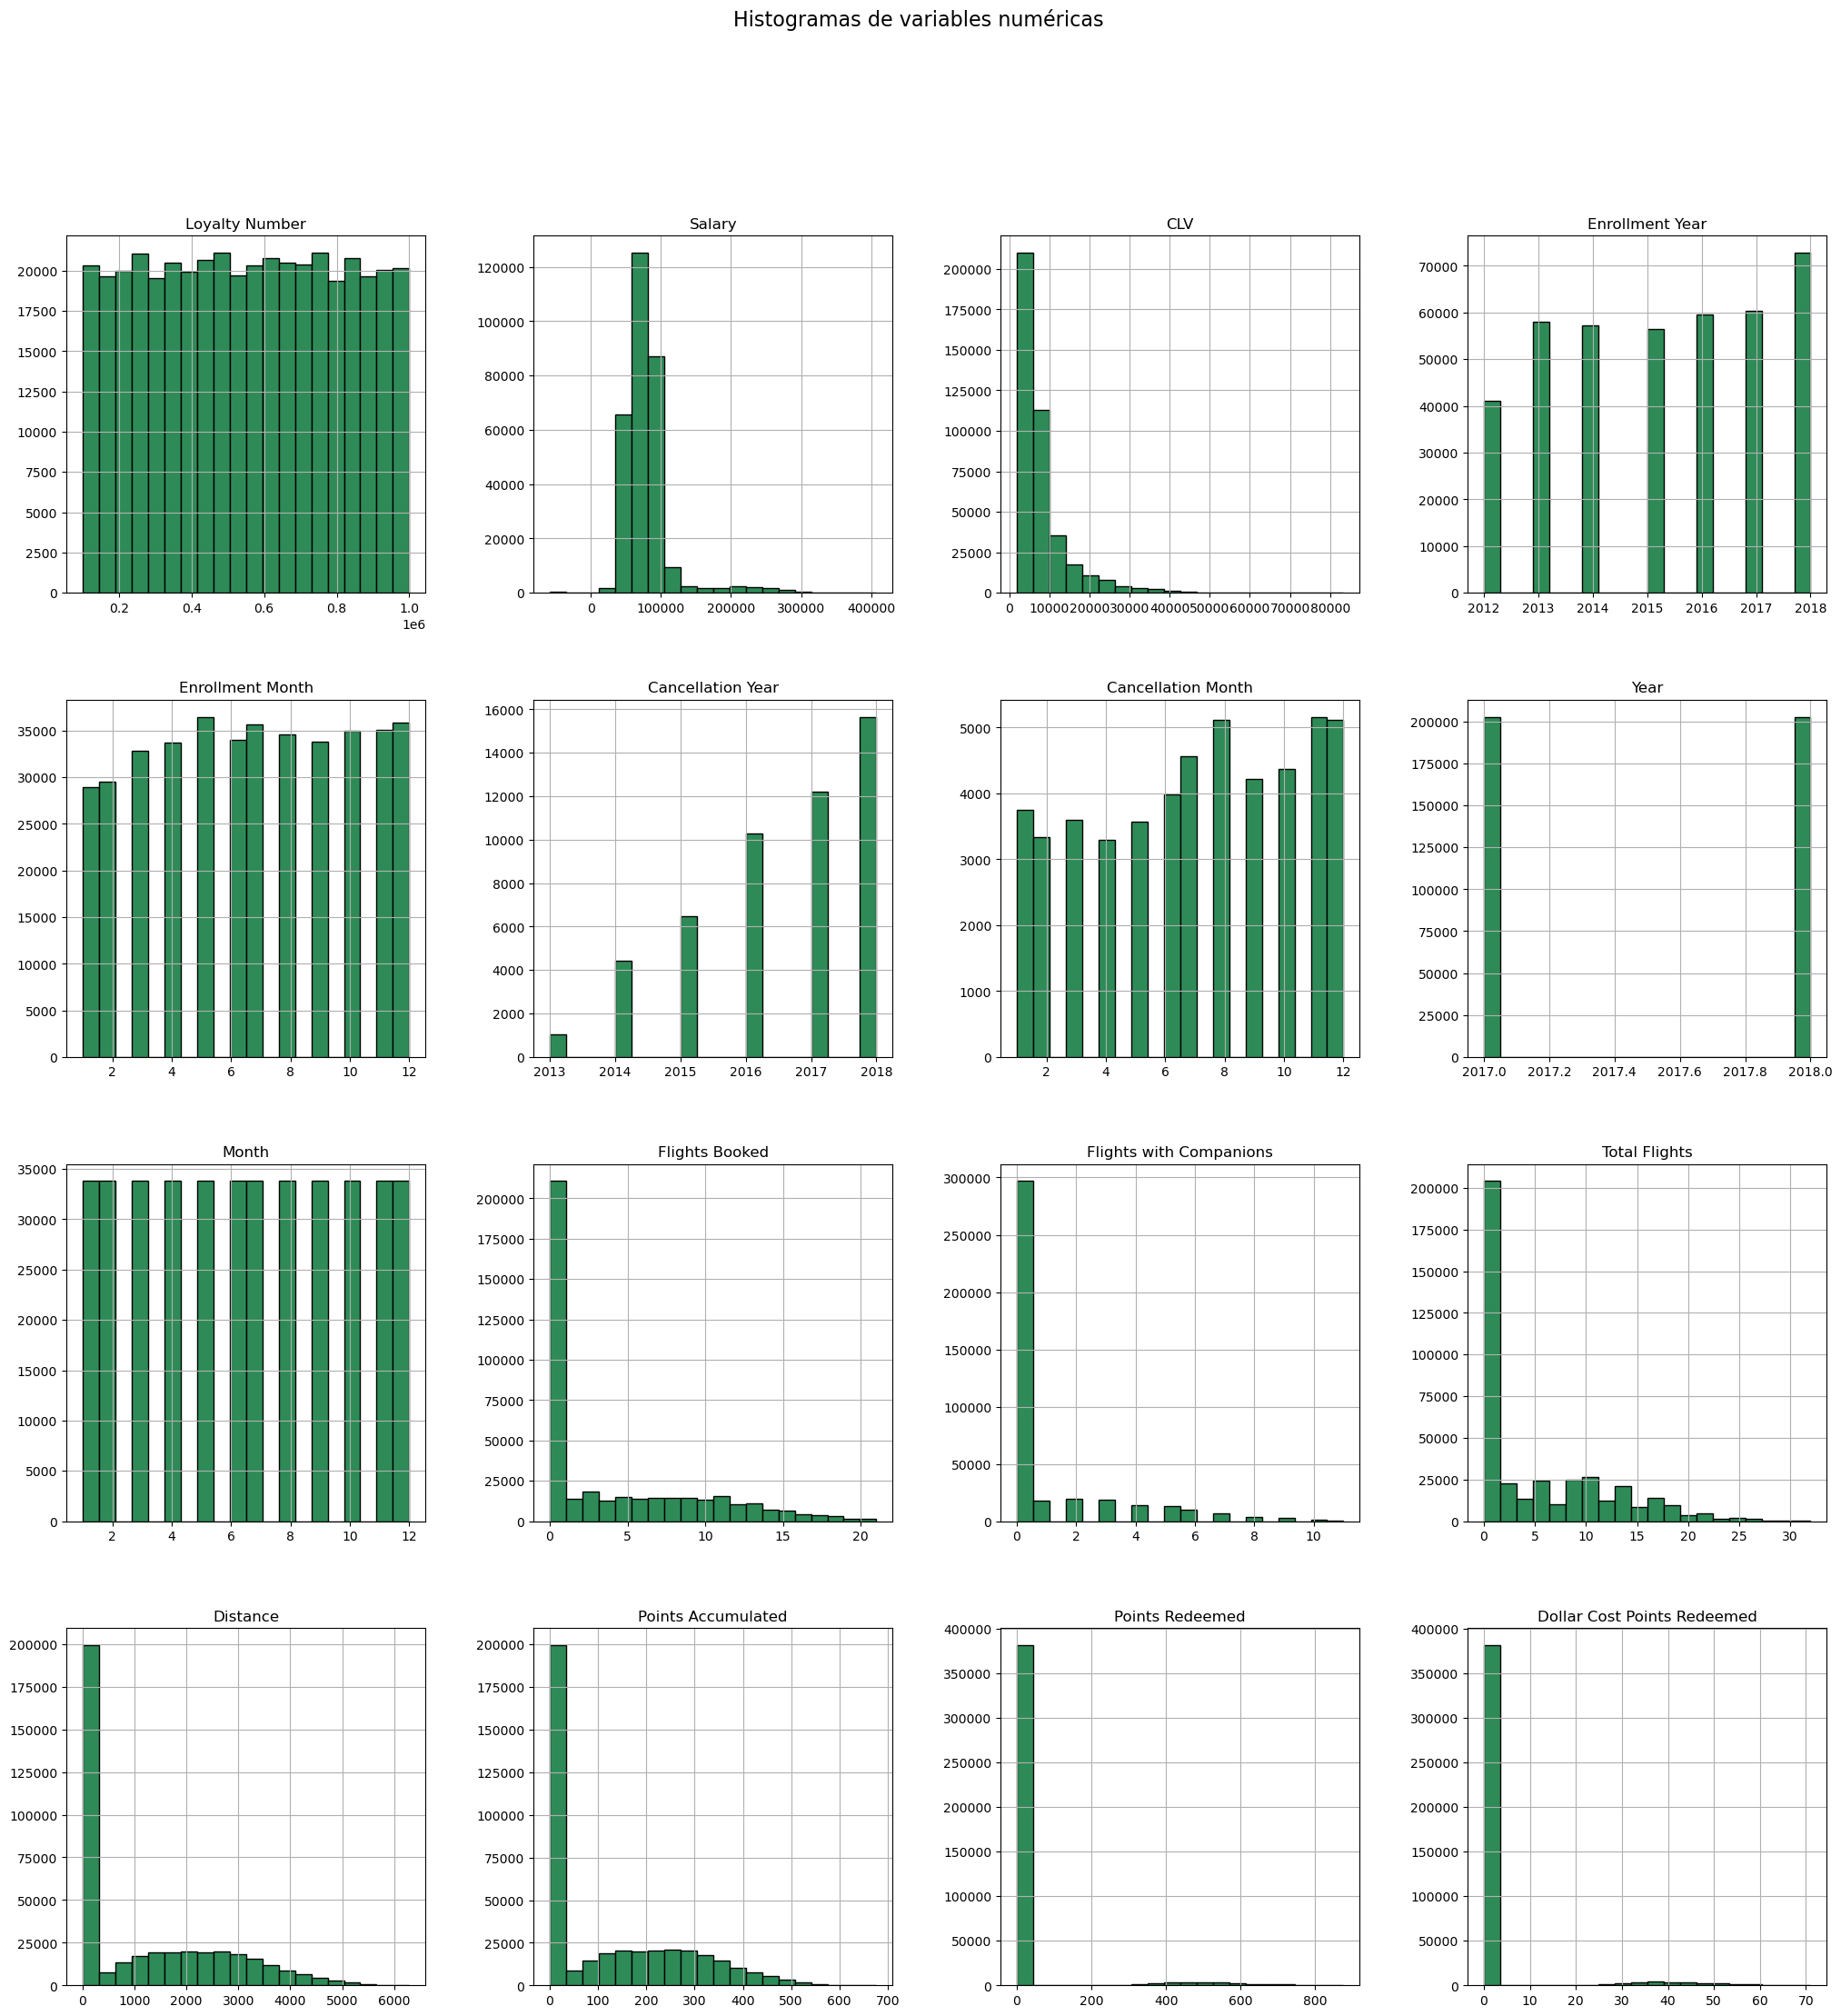


---------- BARRAS CATEG√ìRICAS ----------


D:\Temp\ipykernel_11808\3646713937.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=c, data=df_merged, palette=palette)


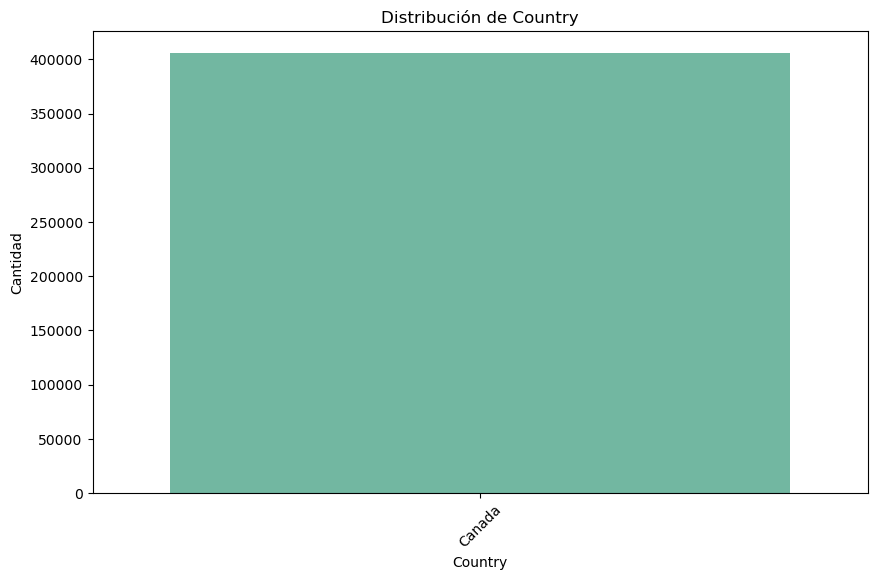

D:\Temp\ipykernel_11808\3646713937.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=c, data=df_merged, palette=palette)


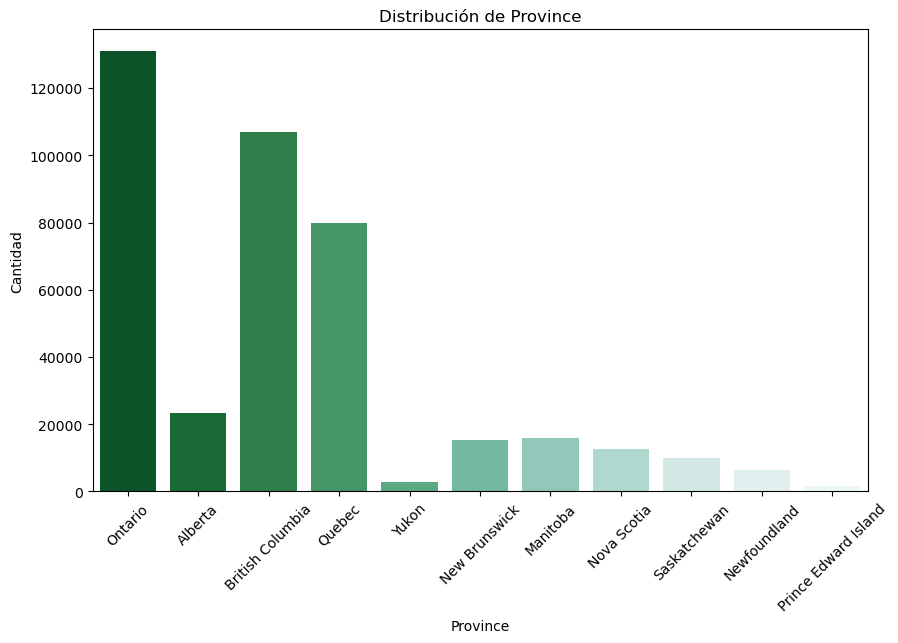

D:\Temp\ipykernel_11808\3646713937.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=c, data=df_merged, palette=palette)


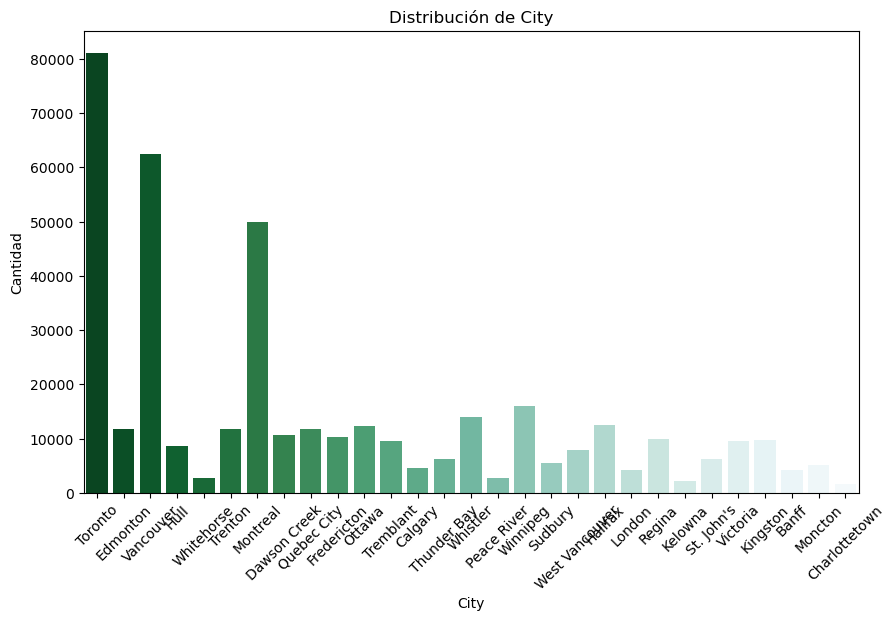

D:\Temp\ipykernel_11808\3646713937.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=c, data=df_merged, palette=palette)


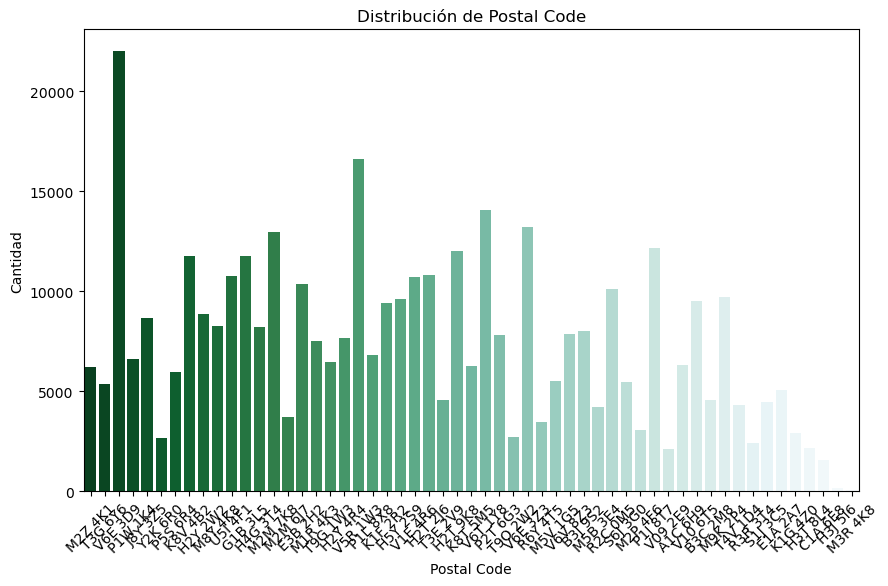

D:\Temp\ipykernel_11808\3646713937.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=c, data=df_merged, palette=palette)


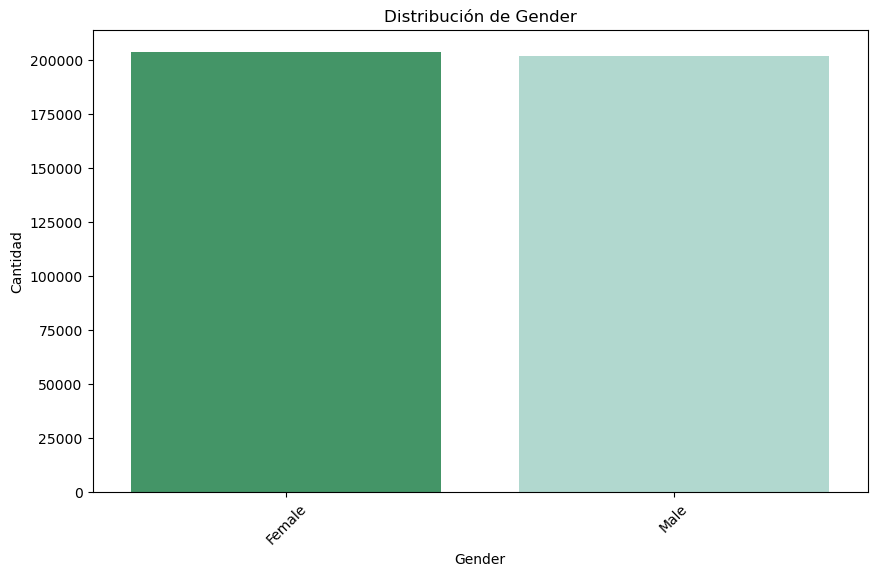

D:\Temp\ipykernel_11808\3646713937.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=c, data=df_merged, palette=palette)


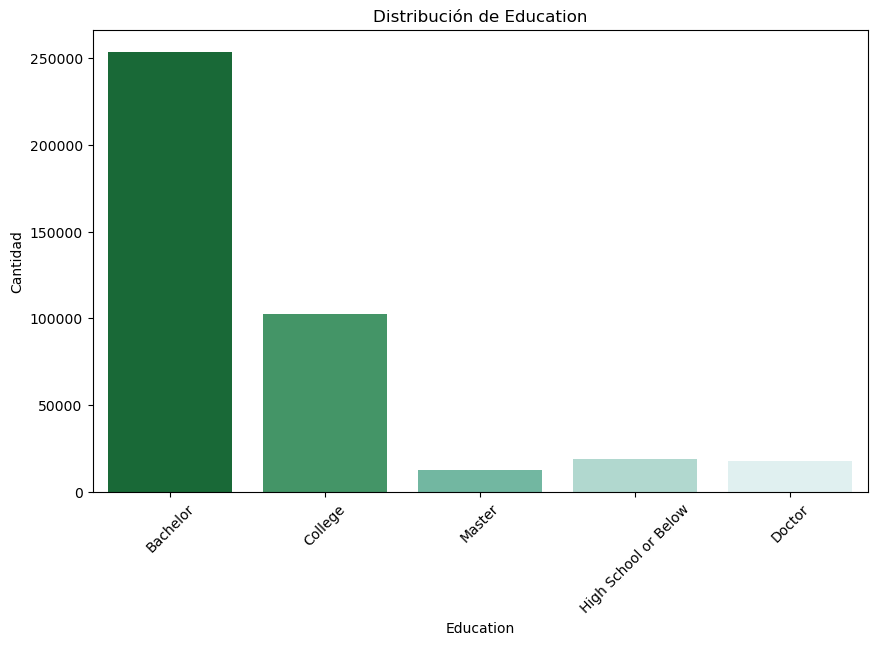

D:\Temp\ipykernel_11808\3646713937.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=c, data=df_merged, palette=palette)


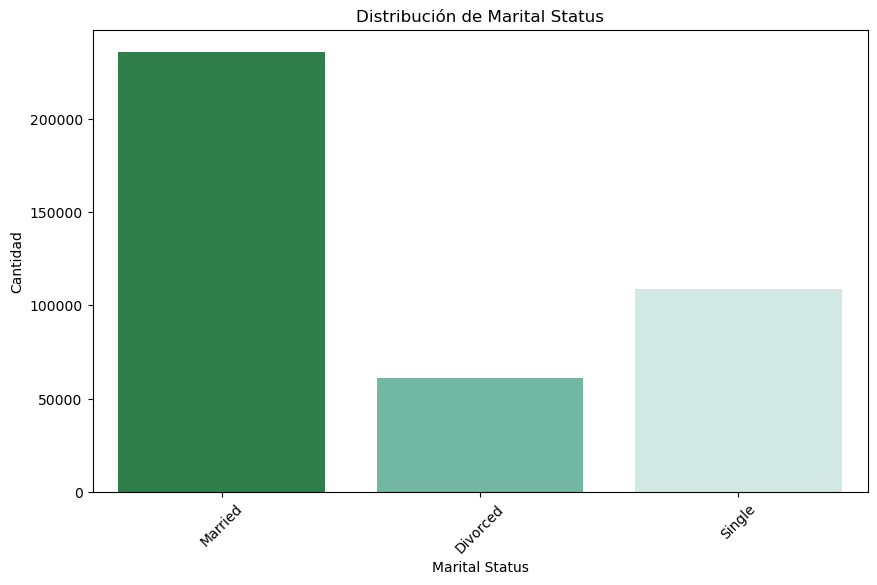

D:\Temp\ipykernel_11808\3646713937.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=c, data=df_merged, palette=palette)


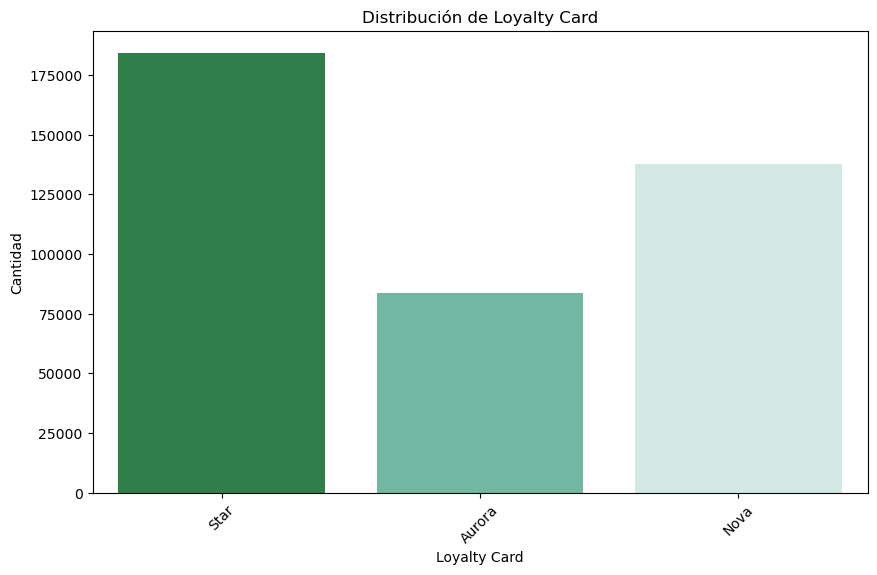

D:\Temp\ipykernel_11808\3646713937.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=c, data=df_merged, palette=palette)


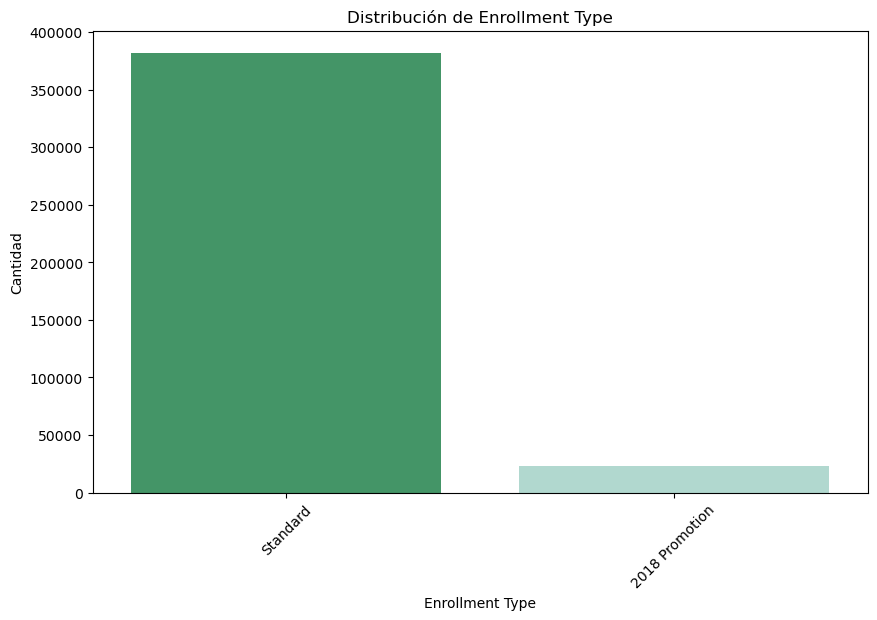

In [68]:
# 5. Exploraci√≥n del DataFrame nuevo resultado de la uni√≥n. ESTA VA CON UNA FUNCI√ìN MUY BONICA =)   =   EDA
# He decidido no poner: .dtypes (porque lo veo bien con .info())
# He dedicido no poner: .isnull() porque prefiero mirarlos despu√©s antes de empezar la gesti√≥n de nulos.

  
def explorar_df(df_merged, nombre="DataFrame"):
    
    print("Primeras filas del DataFrame:")
    display(df_merged.head())

    print("Informaci√≥n general del DataFrame:")
    df_merged.info()
    
    print("\n Tama√±o del DataFrame: Cantidad de (filas, columnas):")
    print(df_merged.shape)
    
    print("\n Nombres de columnas:")
    for col in df_merged.columns:
        print(col)

    print("\n  DESCRIBE NUM√âRICO ")
    print(df_merged.describe().T) 

    print("\n DESCRIBE CATEG√ìRICO (object/category)")
    print(df_merged.describe(include=["O"]).T)

    print("\n---------- HEAD ------------")
    print(df_merged.head())
    print("\n---------- TAIL ----------")
    print(df_merged.tail())
    print("\n---------- SAMPLE ----------")
    print(df_merged.sample())

    print("\n------- VALUE COUNTS (por columna categ√≥rica) -------")
    col_categoricas =  df_merged.select_dtypes(include=["object", "category"]).columns.tolist()

    for c in col_categoricas:
            print(df_merged[c].value_counts())            #Explora autom√°ticamente todas las columnas categ√≥ricas del DataFrame y muestra sus valores y cu√°ntas veces aparecen.

    print("\n---------- HISTOGRAMAS NUM√âRICOS ----------")
    # Histograma para todas las columnas num√©ricas
    num_cols = df_merged.select_dtypes(include=['int64','float64']).columns.tolist()
    df_merged[num_cols].hist(bins=20, figsize=(25,25), color='#2E8B57', edgecolor='black')  # verde-azulado
    plt.suptitle("Histogramas de variables num√©ricas", fontsize=16)
    plt.show()

    print("\n---------- BARRAS CATEG√ìRICAS ----------")
    # Gr√°fico de barras para columnas categ√≥ricas con degradado azul-verde
    for c in col_categoricas:
        plt.figure(figsize=(10,6))
        # Paleta personalizada azul-verde
        palette = sns.color_palette("BuGn_r", n_colors=df_merged[c].nunique())
        sns.countplot(x=c, data=df_merged, palette=palette)
        plt.xticks(rotation=45)
        plt.xlabel(f"{c}")
        plt.ylabel("Cantidad")
        plt.title(f"Distribuci√≥n de {c}")
        plt.show()

# Llamo a la funci√≥n
explorar_df(df_merged, "df_merged")

------------------------------------------------
------------------------------------------------

## Ejercicio 

**2. Limpieza de Datos:**
   - Elimina o trata los valores nulos, si los hay, en las columnas clave para asegurar que los datos est√©n completos.
   - Verifica la consistencia y correcci√≥n de los datos para asegurarte de que los datos se presenten de forma coherente.
   - Realiza cualquier ajuste o conversi√≥n necesaria en las columnas (por ejemplo, cambiar tipos de datos) para garantizar la adecuaci√≥n de los datos para el an√°lisis estad√≠stico.

------------------------------------------------
------------------------------------------------

## **GESTI√ìN DE NULOS** ##

**1. Identificamos los nulos en las columnas.**

**2. Diferenciaci√≥n entre variables categ√≥ricas y num√©ricas de lso nulos.**

**3. Aplicaci√≥n de estrategias dependiendo de distintos factores:**

## **1. Identificamos los nulos en las columnas.** ##

In [69]:
#1. Identificamos los nulos en las columnas y que me cree una tabla con los nombres de cada columna / nulos / % de nulos / tipo de dato de la columna.

# Crear tabla con nulos por columna
nulos_en_df_merged = (df_merged.isnull().sum().reset_index().rename(columns={"index": "columna", 0: "nulos"})
)

# Calcular porcentaje de nulos
nulos_en_df_merged["% nulos"] = (nulos_en_df_merged["nulos"] / len(df_merged) * 100).round(2)

# A√±adir tipo de dato (dtype) de cada columna
nulos_en_df_merged["dtype"] = nulos_en_df_merged["columna"].map(df_merged.dtypes)

# Mostrar la tabla
nulos_en_df_merged

columna   nulos  % nulos    dtype
0                Loyalty Number       0     0.00    int64
1                       Country       0     0.00   object
2                      Province       0     0.00   object
3                          City       0     0.00   object
4                   Postal Code       0     0.00   object
5                        Gender       0     0.00   object
6                     Education       0     0.00   object
7                        Salary  102672    25.31  float64
8                Marital Status       0     0.00   object
9                  Loyalty Card       0     0.00   object
10                          CLV       0     0.00  float64
11              Enrollment Type       0     0.00   object
12              Enrollment Year       0     0.00    int64
13             Enrollment Month       0     0.00    int64
14            Cancellation Year  355560    87.66  float64
15           Cancellation Month  355560    87.66  float64
16                         Year       0     0.00    int64
17                        Month       0     0.00    int64
18               Flights Booked       0     0.00    int64
19      Flights with Companions       0     0.00    int64
20                Total Flights       0     0.00    int64
21                     Distance       0     0.00    int64
22           Points Accumulated       0     0.00  float64
23              Points Redeemed       0     0.00    int64
24  Dollar Cost Points Redeemed       0     0.00    int64

## **2. Diferenciaci√≥n entre variables categ√≥ricas y num√©ricas de los nulos.** ##

In [70]:
#2. Crear tabla con nulos por columna
nulos_en_df_merged = (df_merged.isnull().sum().reset_index().rename(columns={"index": "columna", 0: "nulos"}))

# Calcular porcentaje de nulos
nulos_en_df_merged["% nulos"] = (nulos_en_df_merged["nulos"] / len(df_merged) * 100).round(2)

# A√±adir tipo de dato (dtype) de cada columna
nulos_en_df_merged["dtype"] = nulos_en_df_merged["columna"].map(df_merged.dtypes)

# Creo una nueva columna "tipo_variable" que etiqueta cada columna del DataFramen como categorica o num√©rica en caso contrario.  
nulos_en_df_merged["tipo_variable"] = nulos_en_df_merged["dtype"].apply(lambda x: "categ√≥rica" if x == "object" or str(x) == "category" else "num√©rica")

# Mostrar tabla completa
nulos_en_df_merged


columna   nulos  % nulos    dtype tipo_variable
0                Loyalty Number       0     0.00    int64      num√©rica
1                       Country       0     0.00   object    categ√≥rica
2                      Province       0     0.00   object    categ√≥rica
3                          City       0     0.00   object    categ√≥rica
4                   Postal Code       0     0.00   object    categ√≥rica
5                        Gender       0     0.00   object    categ√≥rica
6                     Education       0     0.00   object    categ√≥rica
7                        Salary  102672    25.31  float64      num√©rica
8                Marital Status       0     0.00   object    categ√≥rica
9                  Loyalty Card       0     0.00   object    categ√≥rica
10                          CLV       0     0.00  float64      num√©rica
11              Enrollment Type       0     0.00   object    categ√≥rica
12              Enrollment Year       0     0.00    int64      num√©rica
13             Enrollment Month       0     0.00    int64      num√©rica
14            Cancellation Year  355560    87.66  float64      num√©rica
15           Cancellation Month  355560    87.66  float64      num√©rica
16                         Year       0     0.00    int64      num√©rica
17                        Month       0     0.00    int64      num√©rica
18               Flights Booked       0     0.00    int64      num√©rica
19      Flights with Companions       0     0.00    int64      num√©rica
20                Total Flights       0     0.00    int64      num√©rica
21                     Distance       0     0.00    int64      num√©rica
22           Points Accumulated       0     0.00  float64      num√©rica
23              Points Redeemed       0     0.00    int64      num√©rica
24  Dollar Cost Points Redeemed       0     0.00    int64      num√©rica

In [71]:
# Listas de columnas categ√≥ricas y num√©ricas para verlas m√°s claras
categoricas = nulos_en_df_merged[nulos_en_df_merged["tipo_variable"] == "categ√≥rica"]["columna"].tolist()
numericas = nulos_en_df_merged[nulos_en_df_merged["tipo_variable"] == "num√©rica"]["columna"].tolist()

print("Columnas categ√≥ricas:", categoricas)
print("\nColumnas num√©ricas:", numericas)


Columnas categ√≥ricas: ['Country', 'Province', 'City', 'Postal Code', 'Gender', 'Education', 'Marital Status', 'Loyalty Card', 'Enrollment Type']

Columnas num√©ricas: ['Loyalty Number', 'Salary', 'CLV', 'Enrollment Year', 'Enrollment Month', 'Cancellation Year', 'Cancellation Month', 'Year', 'Month', 'Flights Booked', 'Flights with Companions', 'Total Flights', 'Distance', 'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed']


## **3. Aplicaci√≥n de estrategias dependiendo de distintos factores:** ##
   - Importancia de las variables dentro del an√°lisis: ¬øSE QUEDAN O SE VAN?

   **NOTA IMPORTANTE: Analic√© columna por columna. En las columnas donde no pongo nada, es porque comprobado la cantidad de nulos/tipo de valor en relaci√≥n al concepto que es e importancia de la columna concluyo que se va a MANTENER COMO EST√Å, las dem√°s son susceptibles de cambios y se indican bajo la columna a cambiar.** 


 **COLUMNAS CATEGORICAS:**
- **Country:** Pa√≠s de residencia del cliente.
- **Province:** Provincia o estado de residencia del cliente (aplicable a pa√≠ses con divisiones provinciales o estatales, como Canad√°).
- **City:** Ciudad de residencia del cliente.
- **Postal Code:** C√≥digo postal del cliente.
- **Gender:** G√©nero del cliente (ej. Male para masculino y Female para femenino).
- **Education:** Nivel educativo alcanzado por el cliente (ej. Bachelor para licenciatura, College para estudios universitarios o t√©cnicos, etc.).
- **Marital Status:** Estado civil del cliente (ej. Single para soltero, Married para casado, Divorced para divorciado, etc.).
- **Loyalty Card:** Tipo de tarjeta de lealtad que posee el cliente. Esto podr√≠a indicar distintos niveles o categor√≠as dentro del programa de lealtad.
- **Enrollment Type:** Tipo de inscripci√≥n del cliente en el programa de lealtad (ej. Standard).

**COLUMNAS NUM√âRICAS:**
- **`Loyalty Number:`** Este atributo representa un identificador √∫nico para cada cliente dentro del programa de lealtad de la aerol√≠nea. Cada n√∫mero de lealtad corresponde a un cliente espec√≠fico.
    * MANTENER SIN CAMBIOS. es la ID. IMPORTANTE. No tiene nulos. El tipo de dato es correcto int64. (Porque indica un identificador de cliente)

- **`Salary:`** Ingreso anual estimado del cliente.
    * CAMBIO: SI. Con un 25‚ÄØ% de nulos en Salary, imputar con la mediana es generalmente una buena opci√≥n. Por qu√©: Puedo imputar sin perder demasiada informaci√≥n ni sesgar demasiado los resultados. La mediana representa el valor central y es m√°s robusta.
    VERIFICAR: La distribuci√≥n con un histograma. Si es sesgada imputar con mediana, ademm√°s es mas segura con nulos moderados. Y un 25% no son pocos.

- **`CLV (Customer Lifetime Value):`** Valor total estimado que el cliente aporta a la empresa durante toda la relaci√≥n que mantiene con ella.
- **`Enrollment Year:`** A√±o en que el cliente se inscribi√≥ en el programa de lealtad. Y la columna **`Enrollment Month:`** Mes en que el cliente se inscribi√≥ en el programa de lealtad.
    * CAMBIO: Crear columna nueva uniendo ambas en: "Enrolmmnet_Date". De int64 a tipo DATETIPE, porque representan un a√±o y un mes. No tienen nulos. 
    * BORRAR: Columnas anteriores: Enrollment Year y Enrollment Month.
    
- **`Cancellation Year:`** A√±o en que el cliente cancel√≥ su membres√≠a en el programa de lealtad, si aplica. Y la columna **`Cancellation Month:`** Mes en que el cliente cancel√≥ su membres√≠a en el programa de lealtad, si aplica.
    * CAMBIO: Crear columna nueva uniendo ambas en: "Cancellation_Date". De int64 a tipo DATETIPE, porque representan un a√±o y un mes. Tiene un 86,66% de nulos ambas columnas, y adem√°s los nulos significan que no se han dado de baja,"si aplica" por lo que no voy a modificarlos a STR (porque primero pense que se podian poner como "ACTIVOS") pero es mejor modificarlos solo de float64 a int64 , ya que mantenerlos en n√∫meros me permitir√° seguir haciendo calculos num√©ricos. 
    * BORRAR: Columnas anteriores: Cancellation Year y Cancellation Month.
 - **Year:** Indica el a√±o en el cual se registraron las actividades de vuelo para el cliente.
- **Month:** Representa el mes del a√±o (de 1 a 12) en el cual ocurrieron las actividades de vuelo.
- **Flights Booked:** N√∫mero total de vuelos reservados por el cliente en ese mes espec√≠fico.
- **Flights with Companions:** N√∫mero de vuelos reservados en los cuales el cliente viaj√≥ con acompa√±antes.
- **Total Flights:** El n√∫mero total de vuelos que el cliente ha realizado.
- **Distance:** La distancia total (presumiblemente en millas o kil√≥metros) que el cliente ha volado durante el mes.
- **`Points Accumulated:`** Puntos acumulados por el cliente en el programa de lealtad durante el mes, con base en la distancia volada u otros factores.
    * Aunque es fload64 y a priori podr√≠a parecer que es mejor cambiarla a int64 porque son puntos,  he podido comprobar con un df_merged.sample() que viendo aleatoriamente numeros me han aparecido decimales y estaban redondeados a 2, asi que no la modifico. 
- **Points Redeemed:** Puntos que el cliente ha canjeado en el mes, posiblemente para obtener beneficios como vuelos gratis, mejoras, etc.
- **Dollar Cost Points Redeemed:** El valor en d√≥lares de los puntos que el cliente ha redimido durante el mes.









In [72]:
# Enrollment Year y Enrollment Month:

# CAMBIO: Crear columna nueva uniendo ambas en: "Enrolmmnet_Date". De int64 a tipo DATETIPE, porque representan un a√±o y una fecha. 
df_merged["Enrollment_Date"] = pd.to_datetime(
    df_merged["Enrollment Year"].astype(str) + "-" +
    df_merged["Enrollment Month"].astype(str) + "-01",
    format="%Y-%m-%d")

In [73]:
# BORRAR: Columnas anteriores: Enrollment Year y Enrollment Month. 
df_merged.drop(["Enrollment Year", "Enrollment Month"], axis=1, inplace=True)

df_merged 

Loyalty Number Country  Province      City Postal Code  Gender  \
0               480934  Canada   Ontario   Toronto     M2Z 4K1  Female   
1               480934  Canada   Ontario   Toronto     M2Z 4K1  Female   
2               480934  Canada   Ontario   Toronto     M2Z 4K1  Female   
3               480934  Canada   Ontario   Toronto     M2Z 4K1  Female   
4               480934  Canada   Ontario   Toronto     M2Z 4K1  Female   
...                ...     ...       ...       ...         ...     ...   
405619          652627  Canada  Manitoba  Winnipeg     R2C 0M5  Female   
405620          652627  Canada  Manitoba  Winnipeg     R2C 0M5  Female   
405621          652627  Canada  Manitoba  Winnipeg     R2C 0M5  Female   
405622          652627  Canada  Manitoba  Winnipeg     R2C 0M5  Female   
405623          652627  Canada  Manitoba  Winnipeg     R2C 0M5  Female   

       Education   Salary Marital Status Loyalty Card       CLV  \
0       Bachelor  83236.0        Married         Star   3839.14   
1       Bachelor  83236.0        Married         Star   3839.14   
2       Bachelor  83236.0        Married         Star   3839.14   
3       Bachelor  83236.0        Married         Star   3839.14   
4       Bachelor  83236.0        Married         Star   3839.14   
...          ...      ...            ...          ...       ...   
405619  Bachelor  75049.0        Married         Star  83325.38   
405620  Bachelor  75049.0        Married         Star  83325.38   
405621  Bachelor  75049.0        Married         Star  83325.38   
405622  Bachelor  75049.0        Married         Star  83325.38   
405623  Bachelor  75049.0        Married         Star  83325.38   

       Enrollment Type  Cancellation Year  Cancellation Month  Year  Month  \
0             Standard                NaN                 NaN  2017      1   
1             Standard                NaN                 NaN  2017      2   
2             Standard                NaN                 NaN  2017      3   
3             Standard                NaN                 NaN  2017      4   
4             Standard                NaN                 NaN  2018     10   
...                ...                ...                 ...   ...    ...   
405619        Standard             2016.0                 8.0  2018      8   
405620        Standard             2016.0                 8.0  2018      9   
405621        Standard             2016.0                 8.0  2018     10   
405622        Standard             2016.0                 8.0  2018     11   
405623        Standard             2016.0                 8.0  2018     12   

        Flights Booked  Flights with Companions  Total Flights  Distance  \
0                    0                        0              0         0   
1                    3                        0              3      2823   
2                    0                        0              0         0   
3                    0                        0              0         0   
4                    6                        2              8      3352   
...                ...                      ...            ...       ...   
405619               0                        0              0         0   
405620               0                        0              0         0   
405621               0                        0              0         0   
405622               0                        0              0         0   
405623               0                        0              0         0   

        Points Accumulated  Points Redeemed  Dollar Cost Points Redeemed  \
0                      0.0                0                            0   
1                    282.0                0                            0   
2                      0.0                0                            0   
3                      0.0                0                            0   
4                    335.0              465                           38   
...     

In [74]:
# Cancellation Year y Cancellation Month.

# CAMBIO: Crear columna nueva uniendo ambas en: "Cancellation_Date". De int64 a tipo DATETIPE, porque representan un a√±o y una fecha. 
# Los nulos los mantenemos, sin modificarlos. Nos interesa que sigane stando en int64

# Definir la funci√≥n
def crear_cancellation_date(row):
    if pd.isna(row["Cancellation Year"]) or pd.isna(row["Cancellation Month"]):
        return pd.NaT  # Mantener nulos
    return pd.Timestamp(year=int(row["Cancellation Year"]), month=int(row["Cancellation Month"]), day=1)

# Aplicar la funci√≥n al DataFrame
df_merged["Cancellation_Date"] = df_merged.apply(crear_cancellation_date, axis=1)

# Comprobar el resultado
print(df_merged[["Cancellation Year", "Cancellation Month", "Cancellation_Date"]].head(10))
print(df_merged["Cancellation_Date"].dtype)


   Cancellation Year  Cancellation Month Cancellation_Date
0                NaN                 NaN               NaT
1                NaN                 NaN               NaT
2                NaN                 NaN               NaT
3                NaN                 NaN               NaT
4                NaN                 NaN               NaT
5                NaN                 NaN               NaT
6                NaN                 NaN               NaT
7                NaN                 NaN               NaT
8                NaN                 NaN               NaT
9                NaN                 NaN               NaT
datetime64[ns]


In [75]:
# BORRAR: Columnas anteriores: Cancellation Year, Cancellation Month. 
df_merged.drop(["Cancellation Year", "Cancellation Month"], axis=1, inplace=True)

df_merged 

Loyalty Number Country  Province      City Postal Code  Gender  \
0               480934  Canada   Ontario   Toronto     M2Z 4K1  Female   
1               480934  Canada   Ontario   Toronto     M2Z 4K1  Female   
2               480934  Canada   Ontario   Toronto     M2Z 4K1  Female   
3               480934  Canada   Ontario   Toronto     M2Z 4K1  Female   
4               480934  Canada   Ontario   Toronto     M2Z 4K1  Female   
...                ...     ...       ...       ...         ...     ...   
405619          652627  Canada  Manitoba  Winnipeg     R2C 0M5  Female   
405620          652627  Canada  Manitoba  Winnipeg     R2C 0M5  Female   
405621          652627  Canada  Manitoba  Winnipeg     R2C 0M5  Female   
405622          652627  Canada  Manitoba  Winnipeg     R2C 0M5  Female   
405623          652627  Canada  Manitoba  Winnipeg     R2C 0M5  Female   

       Education   Salary Marital Status Loyalty Card       CLV  \
0       Bachelor  83236.0        Married         Star   3839.14   
1       Bachelor  83236.0        Married         Star   3839.14   
2       Bachelor  83236.0        Married         Star   3839.14   
3       Bachelor  83236.0        Married         Star   3839.14   
4       Bachelor  83236.0        Married         Star   3839.14   
...          ...      ...            ...          ...       ...   
405619  Bachelor  75049.0        Married         Star  83325.38   
405620  Bachelor  75049.0        Married         Star  83325.38   
405621  Bachelor  75049.0        Married         Star  83325.38   
405622  Bachelor  75049.0        Married         Star  83325.38   
405623  Bachelor  75049.0        Married         Star  83325.38   

       Enrollment Type  Year  Month  Flights Booked  Flights with Companions  \
0             Standard  2017      1               0                        0   
1             Standard  2017      2               3                        0   
2             Standard  2017      3               0                        0   
3             Standard  2017      4               0                        0   
4             Standard  2018     10               6                        2   
...                ...   ...    ...             ...                      ...   
405619        Standard  2018      8               0                        0   
405620        Standard  2018      9               0                        0   
405621        Standard  2018     10               0                        0   
405622        Standard  2018     11               0                        0   
405623        Standard  2018     12               0                        0   

        Total Flights  Distance  Points Accumulated  Points Redeemed  \
0                   0         0                 0.0                0   
1                   3      2823               282.0                0   
2                   0         0                 0.0                0   
3                   0         0                 0.0                0   
4                   8      3352               335.0              465   
...               ...       ...                 ...              ...   
405619              0         0                 0.0                0   
405620              0         0                 0.0                0   
405621              0         0                 0.0                0   
405622              0         0                 0.0                0   
405623              0         0                 0.0                0   

        Dollar Cost Points Redeemed Enrollment_Date Cancellation_Date  
0                                 0      2016-02-01               NaT  
1                                 0      2016-02-01               NaT  
2                                 0      2016-02-01               NaT  
3                                 0      2016-02-01               NaT  
4                                38      2016-02-01               NaT  
...                             ...             ...     

In [76]:
df_merged.isnull()

Loyalty Number  Country  Province   City  Postal Code  Gender  \
0                False    False     False  False        False   False   
1                False    False     False  False        False   False   
2                False    False     False  False        False   False   
3                False    False     False  False        False   False   
4                False    False     False  False        False   False   
...                ...      ...       ...    ...          ...     ...   
405619           False    False     False  False        False   False   
405620           False    False     False  False        False   False   
405621           False    False     False  False        False   False   
405622           False    False     False  False        False   False   
405623           False    False     False  False        False   False   

        Education  Salary  Marital Status  Loyalty Card    CLV  \
0           False   False           False         False  False   
1           False   False           False         False  False   
2           False   False           False         False  False   
3           False   False           False         False  False   
4           False   False           False         False  False   
...           ...     ...             ...           ...    ...   
405619      False   False           False         False  False   
405620      False   False           False         False  False   
405621      False   False           False         False  False   
405622      False   False           False         False  False   
405623      False   False           False         False  False   

        Enrollment Type   Year  Month  Flights Booked  \
0                 False  False  False           False   
1                 False  False  False           False   
2                 False  False  False           False   
3                 False  False  False           False   
4                 False  False  False           False   
...                 ...    ...    ...             ...   
405619            False  False  False           False   
405620            False  False  False           False   
405621            False  False  False           False   
405622            False  False  False           False   
405623            False  False  False           False   

        Flights with Companions  Total Flights  Distance  Points Accumulated  \
0                         False          False     False               False   
1                         False          False     False               False   
2                         False          False     False               False   
3                         False          False     False               False   
4                         False          False     False               False   
...                         ...            ...       ...                 ...   
405619                    False          False     False               False   
405620                    False          False     False               False   
405621                    False          False     False               False   
405622                    False          False     False               False   
405623                    False          False     False               False   

        Points Redeemed  Dollar Cost Points Redeemed  Enrollment_Date  \
0                 False                        False            False   
1                 False                        False            False   
2                 False                        False            False   
3                 False                        False            False   
4                 False                        False            False   
...                 ...                          ...              ...   
405619            False                        False            False   
405620            False                        False            False   
405621            False            

In [77]:
# Crear una nueva columna con la cantidad de nulos por fila
# Cantidad de nulos por columna
nulos_por_columna = df_merged.isnull().sum()

# Mostrar resultado
print(nulos_por_columna)

Loyalty Number                      0
Country                             0
Province                            0
City                                0
Postal Code                         0
Gender                              0
Education                           0
Salary                         102672
Marital Status                      0
Loyalty Card                        0
CLV                                 0
Enrollment Type                     0
Year                                0
Month                               0
Flights Booked                      0
Flights with Companions             0
Total Flights                       0
Distance                            0
Points Accumulated                  0
Points Redeemed                     0
Dollar Cost Points Redeemed         0
Enrollment_Date                     0
Cancellation_Date              355560
dtype: int64


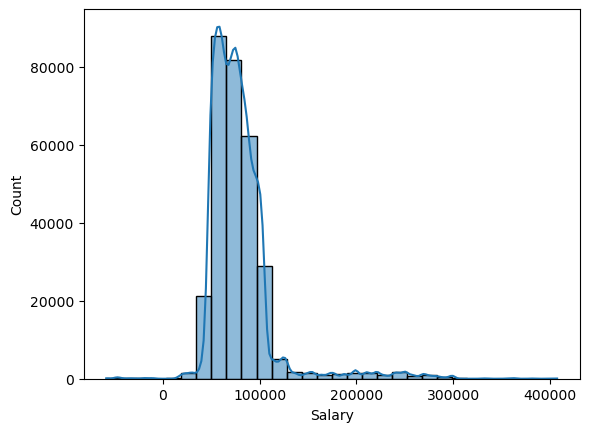

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df_merged["Salary"], bins=30, kde=True)
plt.show()

#CONCLUSI√ìN: Como esta centrada en varios valores utilizar√© la mediana mara imputar los nulos en SALARY.

In [79]:
# Calcular mediana de Salary
median_salary = df_merged["Salary"].median()

# Reemplazar nulos con la mediana
df_merged["Salary"].fillna(median_salary, inplace=True)

# Verificar que no queden nulos
print(df_merged["Salary"].isnull().sum())

0


D:\Temp\ipykernel_11808\3861472339.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_merged["Salary"].fillna(median_salary, inplace=True)


In [80]:
# Contar nulos en la columna Salary
nulos = df_merged["Salary"].isnull().sum()

# Imprimir resultado
print(f"Nulos en Salary: {nulos}")

Nulos en Salary: 0


In [81]:
#COMPROBACI√ìN DE LOS NULOS:
# NOTA: Como se puede comprobar la columna : Cancellation_Date tiene 355560 nulos. 
# Como indico en la explicaci√≥n de columna por columna de arriba, esta columna esel resultado de la uni√≥n de dos columnas de mes y a√±o, 
# pero he optado por no cambiar los nulos (aunque indiquen clientes activos en la membresia, es decir que a priori e pod√≠a cambiar a string) 
# sin embargo prefiero tenerlos en int64 porque me permitir√° as√≠ poder hacer c√°lculos, de lo contrario perder√≠a esa opci√≥n. 

df_merged.isnull().sum()

Loyalty Number                      0
Country                             0
Province                            0
City                                0
Postal Code                         0
Gender                              0
Education                           0
Salary                              0
Marital Status                      0
Loyalty Card                        0
CLV                                 0
Enrollment Type                     0
Year                                0
Month                               0
Flights Booked                      0
Flights with Companions             0
Total Flights                       0
Distance                            0
Points Accumulated                  0
Points Redeemed                     0
Dollar Cost Points Redeemed         0
Enrollment_Date                     0
Cancellation_Date              355560
dtype: int64

------------------------------------------------
------------------------------------------------

**Fase 2: Visualizaci√≥n**

Usando las herramientas de visualizaci√≥n que has aprendido durante este m√≥dulo, contesta a las siguientes gr√°ficas usando la mejor gr√°fica que consideres:  

1. ¬øC√≥mo se distribuye la cantidad de vuelos reservados por mes durante el a√±o?
2. ¬øExiste una relaci√≥n entre la distancia de los vuelos y los puntos acumulados por los cliente?
3. ¬øCu√°l es la distribuci√≥n de los clientes por provincia o estado?
4. ¬øC√≥mo se compara el salario promedio entre los diferentes niveles educativos de los clientes?
5. ¬øCu√°l es la proporci√≥n de clientes con diferentes tipos de tarjetas de fidelidad? 
6. ¬øC√≥mo se distribuyen los clientes seg√∫n su estado civil y g√©nero?

------------------------------------------------
------------------------------------------------

## **1. ¬øC√≥mo se distribuye la cantidad de vuelos reservados por mes durante el a√±o?**  ##

Para visualizar la cantidad de vuelos reservados por mes durante el a√±o, lo que queremos ver es: Variable num√©rica: Flights Booked y Variable categ√≥rica/temporal: Month

D:\Temp\ipykernel_11808\170688809.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


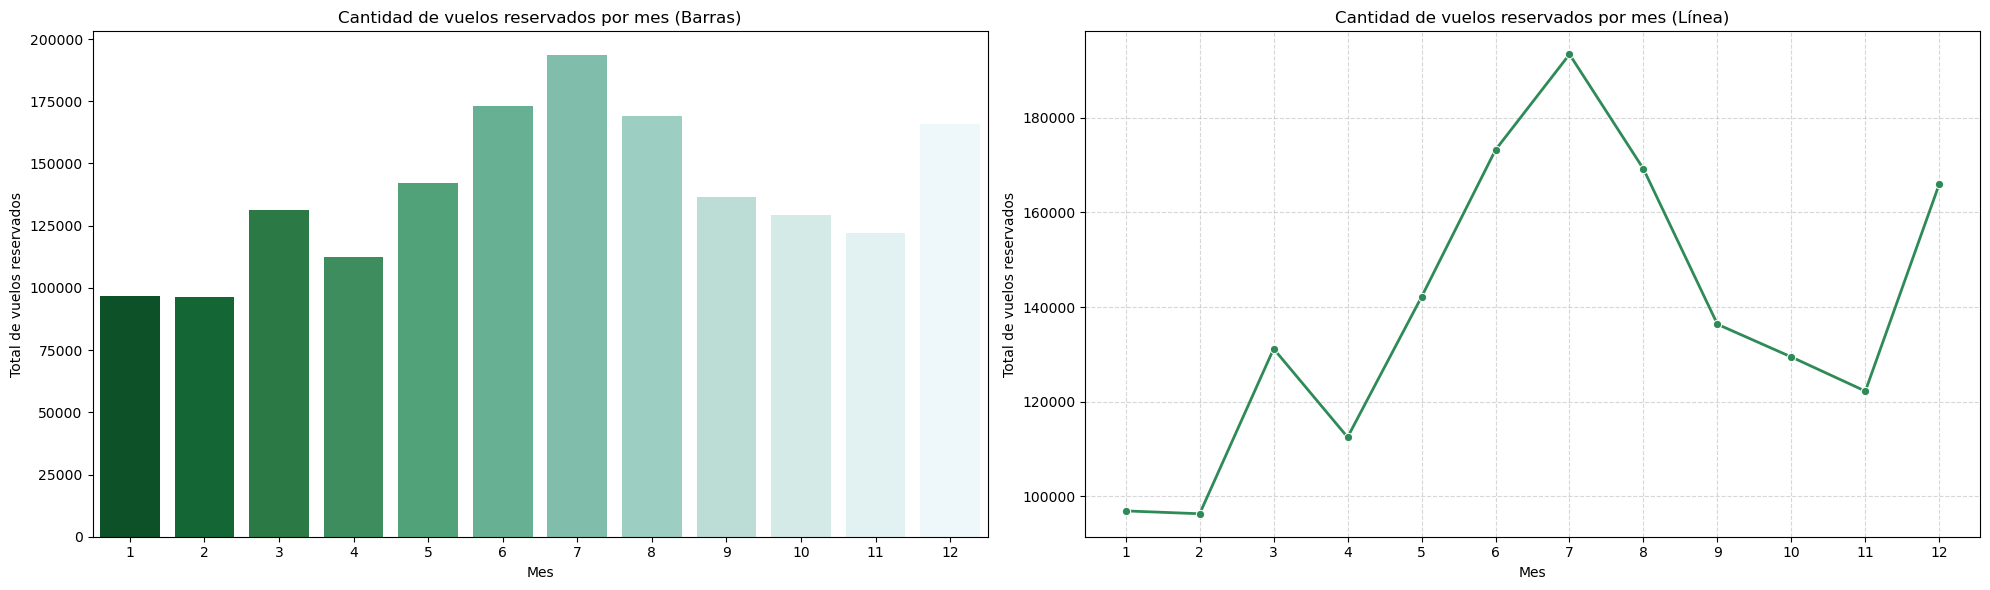

In [82]:
# Agrupar por mes y sumar vuelos reservados
monthly_flights = df_merged.groupby("Month")["Flights Booked"].sum().reset_index()

# Crear figura con dos subplots lado a lado
fig, axes = plt.subplots(1, 2, figsize=(20,6))

# -------- Gr√°fico de barras --------
sns.barplot(
    x="Month",
    y="Flights Booked",
    data=monthly_flights,
    palette=sns.color_palette("BuGn_r", n_colors=12),  # degradado azul-verde
    ax=axes[0]
)
axes[0].set_title("Cantidad de vuelos reservados por mes (Barras)")
axes[0].set_xlabel("Mes")
axes[0].set_ylabel("Total de vuelos reservados")

# -------- Gr√°fico de l√≠nea con marcadores --------
sns.lineplot(
    x="Month",
    y="Flights Booked",
    data=monthly_flights,
    marker="o",
    color="#2E8B57",  # verde-azulado
    linewidth=2,
    ax=axes[1]
)
axes[1].set_title("Cantidad de vuelos reservados por mes (L√≠nea)")
axes[1].set_xlabel("Mes")
axes[1].set_ylabel("Total de vuelos reservados")
axes[1].set_xticks(range(1,13))
axes[1].grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


**CONCLUSI√ìN:**
La gr√°fica muestra la cantidad de vuelos reservados por mes a lo largo del a√±o. A partir de los datos visuales se pueden sacar loas siguientes conclusiones:
1. Los meses con m√°s reservas son junio y julio, alcanzando el punto m√°ximo en julio (alrededor de 200.000 vuelos reservados). Esto indica una clara temporada alta de verano.
2. Los meses con menos reservas son enero y febrero, con cifras cercanas a 100.000 reservas, lo que sugiere una temporada baja despu√©s de las fiestas.
3. A partir de marzo hasta julio, se objserva una tendencia creciente constante en las reservas.
4. Desde agosto en adelante, la cantidad de vuelos reservados comienza a descender gradualmente hasta diciembre, donde el nivel es intermedio.
5. En general, el gr√°fico muestra un patr√≥n estacional claro: incremento de reservas en primavera-verano y disminuci√≥n en oto√±o-invierno.

**Conclusi√≥n general**: La demanda de vuelos es marcadamente estacional, con su punto m√°ximo en verano (junio-julio) y su punto m√≠nimo a comienzos de a√±o (enero-febrero).

## **2. ¬øExiste una relaci√≥n entre la distancia de los vuelos y los puntos acumulados por los cliente?** ##

Aqu√≠ queremos visualizar la relaci√≥n entre dos variables: Distance ‚Üí distancia total volada (num√©rica) y Points Accumulated ‚Üí puntos acumulados (num√©rica)

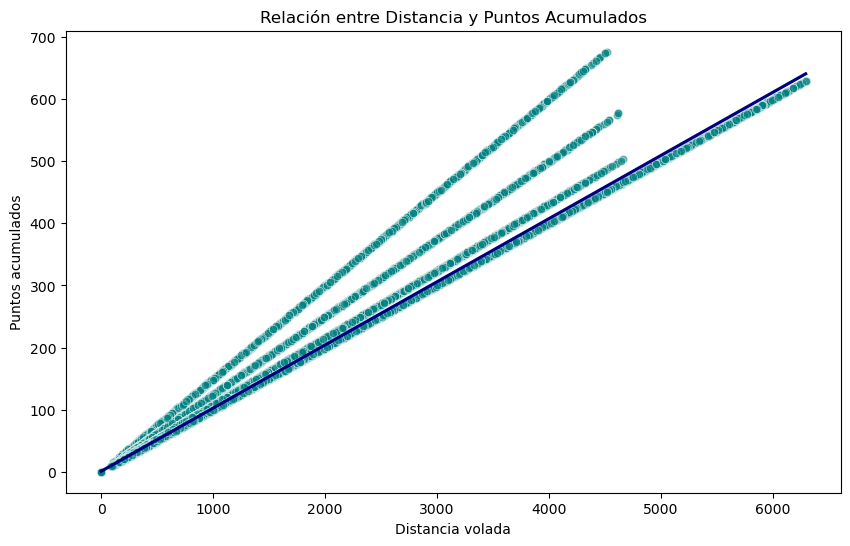

In [83]:
# ¬øQU√â HACE ESTE C√ìDIGO? 
# Muestra cada registro como un punto (scatterplot) para ver la relaci√≥n directa.
# Gr√°fico de barras con degradado azul-verde =)

plt.figure(figsize=(10,6))

# Scatter plot con linea de tendencia opcional
sns.scatterplot(
    x="Distance",
    y="Points Accumulated",
    data=df_merged,
    color="teal",   # un azul-verde uniforme
    alpha=0.6       # transparencia. # alpha=0.6 permite visualizar densidades si hay muchos puntos superpuestos.
)

# Opcional: a√±adir l√≠nea de regresi√≥n
sns.regplot(       # regplot a√±ade una l√≠nea de tendencia para ver si hay correlaci√≥n.
    x="Distance",
    y="Points Accumulated",
    data=df_merged,
    scatter=False,
    color="navy"
)

plt.title("Relaci√≥n entre Distancia y Puntos Acumulados")
plt.xlabel("Distancia volada")
plt.ylabel("Puntos acumulados")
plt.show()


**CONCLUSI√ìN:**
La gr√°fica muestra la relaci√≥n entre la distancia volada y los puntos acumulados: 
1. Existe una relaci√≥n positiva y proporcional entre la distancia volada y los puntos acumulados: a mayor distancia, mayor cantidad de puntos obtenidos.
2. Las l√≠neas formadas por los puntos indican que probablemente existen distintas categ√≥rias o tarifas de vuelo.
3. Todas las l√≠neas parten del mismo origen 0,0, lo que muestra que los puntos comienzan a acumularse √∫nicamente cuando se realiza un vuelo.
4. La relaci√≥n parece muy consistente y predecible, sin grandes desviaciones ni dispersiones, lo cual sugiere que el sistema de asignaci√≥n de puntos es estable y depende principalmente de la distancia recorrida.

**Conclusi√≥n general:**
Los puntos acumulados aumentan proporcionalmente con la distancia volada, siguiendo una relaci√≥n lineal clara. Es probable que existan diferentes escalas o categor√≠as que influyen en la cantidad de puntos otorgados por kil√≥metro, pero la tendencia general demuestra que a m√°s kil√≥metros volados, m√°s puntos acumulan. 

## **3. ¬øCu√°l es la distribuci√≥n de los clientes por provincia o estado?** ##

Aqu√≠ queremos visualizar la relaci√≥n entre dos variables: Province (Queremos contar cu√°ntos clientes hay en cada provincia)
TIPO DE GR√ÅFICO: Seaborn countplot ‚Üí para mostrar conteo de registros por categor√≠a.

NOTA: Como probablemente hay muchas provincias, conviene rotar etiquetas del eje X para que se lean.

D:\Temp\ipykernel_11808\2345729709.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


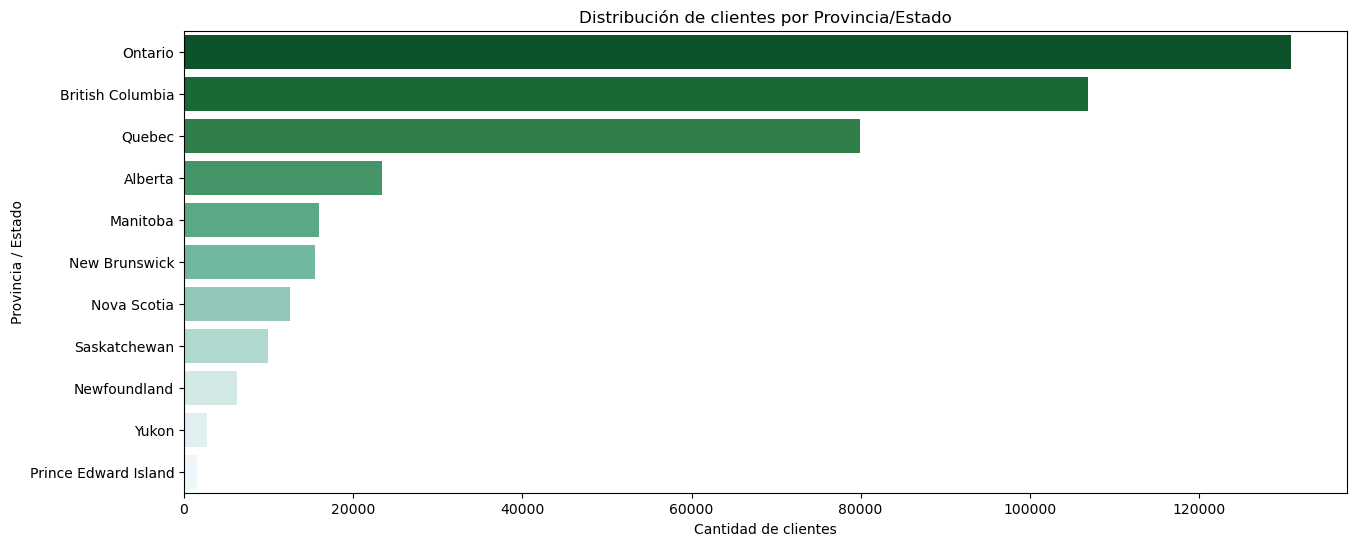

In [84]:
# ¬øQU√â HACE ESTE C√ìDIGO?
# Cuenta cu√°ntos clientes hay por provincia (countplot).
# Gr√°fico de barras con degradado azul-verde =)
# Ordena las provincias de mayor a menor n√∫mero de clientes para que sea m√°s intuitivo.
# Las etiquetas van en eje Y para evitar que se solapen si hay muchas provincias.

plt.figure(figsize=(15,6))

sns.countplot(
    y="Province",          # eje y para que las etiquetas se vean mejor
    data=df_merged,
    order=df_merged["Province"].value_counts().index,  # ordenar por cantidad
    palette=sns.color_palette("BuGn_r", n_colors=df_merged["Province"].nunique())
)

plt.title("Distribuci√≥n de clientes por Provincia/Estado")
plt.xlabel("Cantidad de clientes")
plt.ylabel("Provincia / Estado")
plt.show()


**CONCLUSI√ìN:**
La gr√°fica muestra la distribuci√≥n de clientes por provincia o estado, representada mediante un gr√°fico de barras horizontales.
1. Ontario es la provincia con mayor cantidad de clientes, superando los 120.000, lo que la convierte en el principal mercado o zona de concentraci√≥n de clientes.
2. Le siguien British Columbia y Quebec, tambi√©n con cifras muy altas (entre 80.000 y 100.000), lo que indica que ests tres provincias concentran la mayor parte de la base de clientes.
3. Provincias como Alberta y Manitomba presentan una cantidad media de clientes, siendo mercados secundarios pero a√∫n relevantes.
4. Las provincias de New Brunswick, Nova Scotia, Saskatchewan, Newfoundland, Yukon y Prince Edward Island tienen muchos menos clientes, representando solo una peque√±a fracci√≥n del total. 
5. En conjunto,el gr√°fico evidencia una distribuci√≥n desigual: unas pocas provincipas acumulan la mayor√≠a de lso clientes, mientras que el resto tiene una presencia mucho menor.

**Conclusi√≥n general:**
La mayor√≠a de los clientes se concentran en las provincias m√°s grandes y pobladas -- especialmente Ontario, British Columbia y Quebec --, mientras que las provincias m√°s peque√±as o menos densamente pobladas tienen una representaci√≥n muy reducida. Esto sugiere que el mercado proncipal se encuentra claramente en el centro y oeste del pa√≠s. 

## **4. ¬øC√≥mo se compara el salario promedio entre los diferentes niveles educativos de los clientes?** ##

Aqu√≠ queremos visualizar la relaci√≥n entre dos variable: Education (variable categ√≥rica) y Salary (Variable num√©rica)

Queremos comparar salario promedio por cada nivel educativo.

D:\Temp\ipykernel_11808\1003673604.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
D:\Temp\ipykernel_11808\1003673604.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


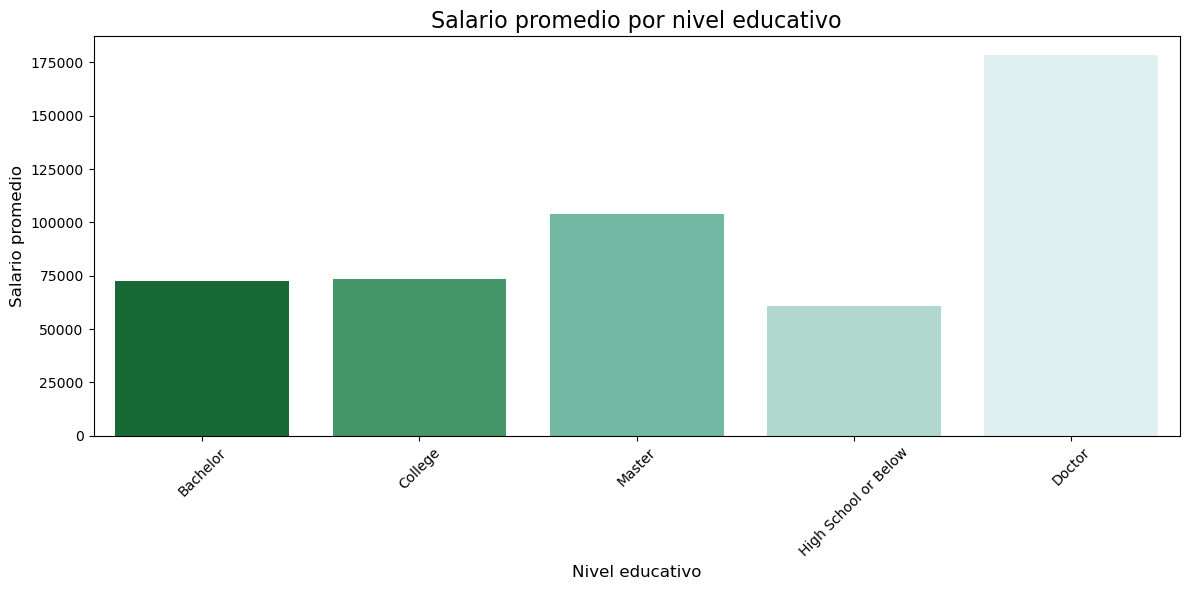

In [85]:
# ¬øQU√â HACE ESTE C√ìDIGO?
# Muestra solo el promedio de salarios por nivel educativo. (Barplot)
# Gr√°fico de barras con degradado azul-verde =)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

# Barplot limpio sin barras de error
sns.barplot(
    x="Education",
    y="Salary",
    data=df_merged,
    palette=sns.color_palette("BuGn_r", n_colors=df_merged["Education"].nunique()),
    ci=None  # elimina las barras de error
)

plt.title("Salario promedio por nivel educativo", fontsize=16)
plt.xlabel("Nivel educativo", fontsize=12)
plt.ylabel("Salario promedio", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**CONCLUSI√ìN:**
La gr√°fica muestra el salario promedio anual, en funci√≥n de cinco niveles educativos distintos.

1. El nivel educativo de Doctor (Doctor) presenta el salario promedio m√°s alto, superando las 175.000, lo que lo establece como el m√°ximo absoluto.

2. El nivel educativo "High School or Below" (Escuela Secundaria o Inferior) tiene el salario promedio m√°s bajo, con una cifra cercana a las 62.500.

3. El nivel de Maestr√≠a (Master) representa el segundo salario promedio m√°s alto, alcanzando aproximadamente las 105.000.

4. Los niveles de Licenciatura (Bachelor) y T√©cnico/Grado Superior (College) tienen salarios promedio casi id√©nticos y se encuentran en un rango intermedio, cerca de las 75.000.

En general, existe una correlaci√≥n positiva y progresiva entre el nivel de educaci√≥n y el salario promedio, donde cada aumento en el grado acad√©mico (con la excepci√≥n de Bachelor y College) se traduce en un incremento significativo en la remuneraci√≥n.

**Conclusi√≥n general:**
El salario promedio est√° fuertemente influenciado por el nivel educativo, mostrando una clara tendencia ascendente que culmina con los salarios m√°s altos para quienes poseen un grado de Doctor.

## **5. ¬øCu√°l es la proporci√≥n de clientes con diferentes tipos de tarjetas de fidelidad?** ##
Aqu√≠ queremos visualizar la relaci√≥n entre clientes con la variable: Loyalty Card. Queremos ver proporciones.

‚ÄúComo la variable es categ√≥rica y nos interesa proporci√≥n de cada tipo de tarjeta, un gr√°fico circular o de barras permite ver de forma r√°pida qu√© tipo de tarjeta es m√°s com√∫n y comparar categor√≠as visualmente.‚Äù

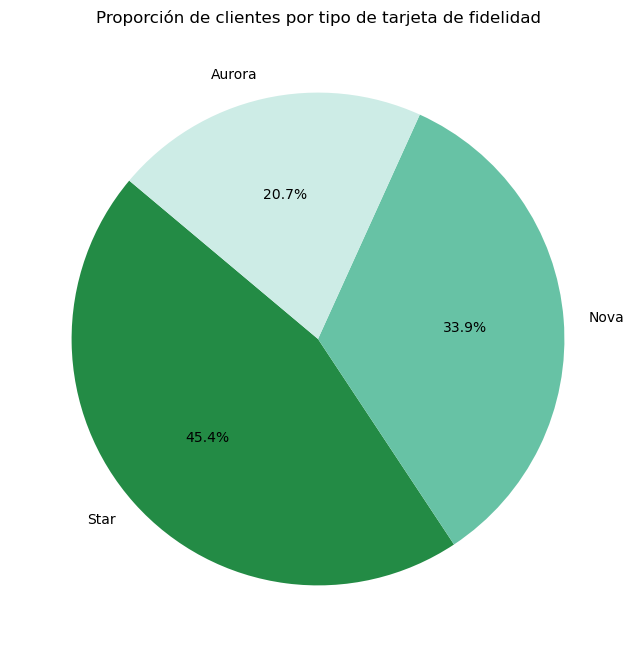

In [86]:
# ¬øQU√â HACE ESTE C√ìDIGO? 
# Muestra los tres tipos de datos de la variable Loyalty Card. (Countplot)
# Gr√°fico de barras con degradado azul-verde =)

proporciones = df_merged["Loyalty Card"].value_counts()  # Muestra lis tres tipos de datos de la variable Loyalty Card.
colores = sns.color_palette("BuGn_r", n_colors=len(proporciones))

plt.figure(figsize=(8,8))
plt.pie(
    proporciones,
    labels=proporciones.index,
    autopct='%1.1f%%',
    colors=colores,
    startangle=140
)
plt.title("Proporci√≥n de clientes por tipo de tarjeta de fidelidad")
plt.show()


**CONCLUSI√ìN:**
La gr√°fica muestra la distribuci√≥n porcentual de clientes entre tres tipos de tarjetas de fidelidad (Star, Nova y Aurora).

1. El tipo de tarjeta Star es la m√°s popular, representando la mayor proporci√≥n de clientes con un 45.4% del total. Esto la posiciona como la categor√≠a dominante.

2. El tipo de tarjeta Aurora tiene la menor proporci√≥n de clientes, con solo un 20.7%. Esto indica que es la tarjeta de fidelidad menos com√∫n entre los clientes.

3. El tipo de tarjeta Nova ocupa una posici√≥n intermedia, abarcando un 33.9% de la base de clientes.

4. La suma de las dos categor√≠as menores (Nova y Aurora: 33.9%+20.7%=54.6%) apenas supera la proporci√≥n de la tarjeta dominante (Star: 45.4%).

En general, el gr√°fico muestra una distribuci√≥n desigual de los clientes, donde la tarjeta Star atrae a casi la mitad de la base de clientes de fidelidad, mientras que la tarjeta Aurora es significativamente menos popular.

**Conclusi√≥n general:**
La gran mayor√≠a de los clientes de fidelidad se concentran en las categor√≠as Star y Nova, siendo Star el principal motor de participaci√≥n en el programa de fidelidad.

## **6. ¬øC√≥mo se distribuyen los clientes seg√∫n su estado civil y g√©nero?** ##
Aqu√≠ queremos visualizar la relaci√≥n entre dos variables categoricas: Marital Status y Gender 

<Axes: xlabel='Gender', ylabel='Marital Status'>

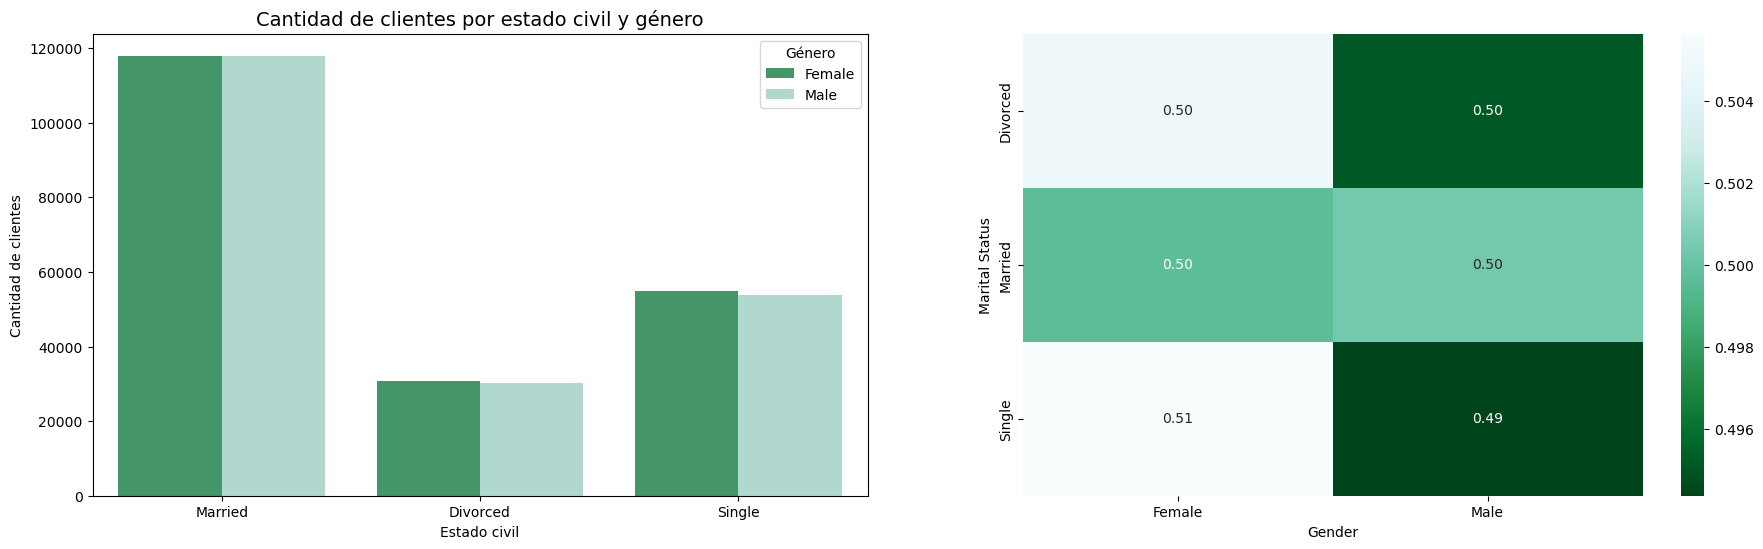

In [87]:
# ¬øQU√â HACE ESTE C√ìDIGO? 

# Crear tabla de contingencia para heatmap
tabla = pd.crosstab(df_merged["Marital Status"], df_merged["Gender"])
tabla_prop = tabla.div(tabla.sum(axis=1), axis=0)  # proporci√≥n por fila

# Figura con dos subplots
fig, axes = plt.subplots(1, 2, figsize=(22,6))

# -------- Countplot --------
sns.countplot(
    x="Marital Status",
    hue="Gender",
    data=df_merged,
    palette=sns.color_palette("BuGn_r", n_colors=2),
    ax=axes[0]
)
axes[0].set_title("Cantidad de clientes por estado civil y g√©nero", fontsize=14)
axes[0].set_xlabel("Estado civil")
axes[0].set_ylabel("Cantidad de clientes")
axes[0].legend(title="G√©nero")

# -------- Heatmap --------
sns.heatmap(
    tabla_prop,
    annot=True,
    fmt=".2f",
    cmap="BuGn_r",
    ax=axes[1]
)


**CONCLUSI√ìN:**
El an√°lisis se basa en dos visualizaciones distintas (gr√°fico de barras y gr√°fico de calor) que representan la misma informaci√≥n sobre la base de clientes.

An√°lisis del Gr√°fico de Barras (Cantidad Absoluta)
1. La categor√≠a "Married" (Casado/a) es, por mucho, la m√°s grande, con un total de clientes que supera las 115.000 personas.

2. Dentro de la categor√≠a "Married", la distribuci√≥n entre g√©neros es casi perfectamente equitativa, aunque el g√©nero "Female" (Mujer) es ligeramente dominante, superando ligeramente al g√©nero "Male" (Hombre).

3. La categor√≠a "Divorced" (Divorciado/a) tiene el menor n√∫mero de clientes, con aproximadamente 30.000 personas en total.

4. La categor√≠a "Single" (Soltero/a) es la segunda m√°s grande, con cerca de 55.000 clientes.

En general, el volumen de clientes es significativamente m√°s alto en el estado civil de casado/a, y la distribuci√≥n por g√©nero es muy equilibrada en las tres categor√≠as.

An√°lisis del Gr√°fico de Calor (Proporci√≥n Relativa)
1. El g√©nero "Female" (Mujer) tiene una ligera predominancia de 0.51 (51%) en la categor√≠a "Single" (Soltero/a), mientras que el g√©nero "Male" tiene un 0.49 (49%).

2. En las categor√≠as "Married" (Casado/a) y "Divorced" (Divorciado/a), la proporci√≥n de clientes es exactamente 0.50 (50%) para ambos g√©neros, lo que confirma una paridad perfecta dentro de esos estados civiles.

3. La escala de color (a la derecha) refuerza que la distribuci√≥n de clientes est√° muy cerca del 0.50, indicando que las diferencias de g√©nero son m√≠nimas o inexistentes en la mayor√≠a de los casos.

**Conclusi√≥n general:** 

El mercado objetivo m√°s grande es el de clientes casados, superando a las otras dos categor√≠as combinadas. La segmentaci√≥n de la base de clientes es notablemente neutra en cuanto al g√©nero, ya que la proporci√≥n de hombres y mujeres es casi id√©ntica en los tres estados civiles.

------------------------------------------------
------------------------------------------------

### BONUS Fase 3: Evaluaci√≥n de Diferencias en Reservas de Vuelos por Nivel Educativo

Utilizando el conjunto de datos que hemos compartido, se busca evaluar si existen diferencias significativas en el n√∫mero de vuelos reservados seg√∫n el nivel educativo de los clientes. Tendremos en mente que los datos que tenemos son solo una muestra de una poblaci√≥n. Para ello, los pasos que deber√°s seguir son: 

1. **Preparaci√≥n de Datos:**
Filtrar el conjunto de datos para incluir √∫nicamente las columnas relevantes: 'Flights Booked' y 'Education'.

2. **An√°lisis Descriptivo:**
Agrupa los datos por nivel educativo y calcula estad√≠sticas descriptivas b√°sicas (como el promedio, mediana, la desviaci√≥n est√°ndar) del n√∫mero de vuelos reservados para cada grupo. Aqu√≠, utilizamos estad√≠stica descriptiva normal.

3. **Prueba Estad√≠stica:**
Realizar una prueba de hip√≥tesis para determinar si existe una diferencia significativa en el n√∫mero de vuelos reservados entre los diferentes niveles educativos. Aqu√≠ utilizamos estad√≠stica inferencial.

------------------------------------------------
------------------------------------------------

## **1. Preparaci√≥n de Datos:** ## 
**Filtrar el conjunto de datos para incluir √∫nicamente las columnas relevantes: 'Flights Booked' y 'Education'.** 

In [88]:
# Filtrar columnas relevantes
nuevo_dataframe = df_merged[['Flights Booked', 'Education']].copy()


# Mostrar las primeras filas para comprobar
nuevo_dataframe.head(200)

Flights Booked Education
0                 0  Bachelor
1                 3  Bachelor
2                 0  Bachelor
3                 0  Bachelor
4                 6  Bachelor
..              ...       ...
195               9  Bachelor
196               7  Bachelor
197              17  Bachelor
198               8  Bachelor
199               0  Bachelor

[200 rows x 2 columns]

## **2. An√°lisis Descriptivo:**  ##

**Agrupa los datos por nivel educativo y calcula estad√≠sticas descriptivas b√°sicas (como el promedio, mediana, la desviaci√≥n est√°ndar) del n√∫mero de vuelos reservados para cada grupo. Aqu√≠, utilizamos estad√≠stica descriptiva normal.**

In [89]:
# Agrupar por nivel educativo y calcular estad√≠sticas descriptivas
estadisticas_educacion = nuevo_dataframe.groupby("Education")["Flights Booked"].agg(count="count", mean="mean", median="median", std="std", min="min", max="max").reset_index()

estadisticas_educacion


Education   count      mean  median       std  min  max
0              Bachelor  253752  4.091093     1.0  5.216995    0   21
1               College  102672  4.153012     1.0  5.242136    0   21
2                Doctor   17856  4.146281     1.0  5.250093    0   21
3  High School or Below   19008  4.155777     1.0  5.234551    0   21
4                Master   12336  4.184014     1.0  5.210294    0   21

## 3. **Prueba Estad√≠stica:** ##
**Realizar una prueba de hip√≥tesis para determinar si existe una diferencia significativa en el n√∫mero de vuelos reservados entre los diferentes niveles educativos. Aqu√≠ utilizamos estad√≠stica inferencial.**

Variable dependiente: Flights Booked. Variable independiente: Education
Queremos saber si los clientes con diferentes niveles educativos reservan una cantidad distinta de vuelos, en promedio.


## **Pasos** ##

**Formulaci√≥n de la hip√≥tesis**:
- H0 (Hip√≥tesis nula) No existen diferencias significativas en el n√∫mero de vuelos reservados entre los distintos niveles educativos. Es decir, la media de Flights Booked es igual para todos los grupos de Education.
- H1 (Hip√≥tesis alternativa) Existen diferencias significativas en el n√∫mero de vuelos reservados entre al menos dos niveles educativos. Es decir, al menos un grupo educativo tiene una media distinta de los dem√°s.

**1. Calculo la MEDIA de Flights Booked**   
- He hecho una gr√°fica para ver si a simple vista se concentran m√°s clientes en alg√∫n punto. 

**2. Despu√©s calculo la DESVIACI√ìN ESTANDAR del n√∫mero de vuelos que han reservados.**

**3. Calculo el INTERVALO DE CONFIANA de mi muestra.**

**4. Paso el test de NORMALIZACI√ìN** **Selecci√≥n de la prueba estad√≠stica**

**5. Creo m√°scaras para cada valor distinto dentro de Education** con el fin de poder hacer la comparativa entre subgrupos. **Interpretaci√≥n de resultados**


In [90]:
#Voy a comprobar los valores de Education para saber que est√°n correctos y no hay nada confuso en los datos. 
df_merged['Education'].unique()

array(['Bachelor', 'College', 'Master', 'High School or Below', 'Doctor'],
      dtype=object)

In [91]:
#Voy a comprobar los valores de Education para saber que est√°n correctos y no hay nada confuso en los datos. 
df_merged['Flights Booked'].unique()

array([ 0,  3,  6, 13, 12,  8, 14,  2,  1,  7, 15,  4,  9, 16, 11,  5, 10,
       17, 18, 19, 20, 21])

In [92]:
# 1. Primero calcular la MEDIA de Flights Booked
media_reserva_vuelos = df_merged['Flights Booked'].mean().round(2)
media_reserva_vuelos

np.float64(4.12)

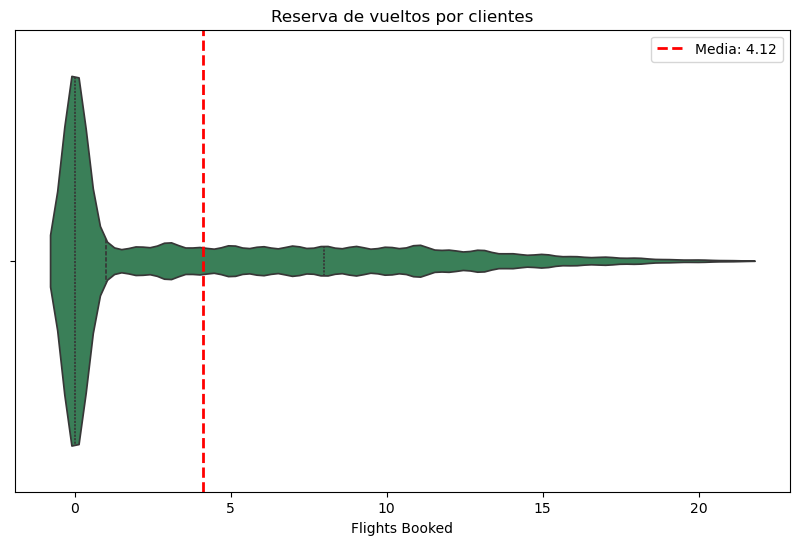

In [95]:
# Una gr√°fica para ver si hay datos que se salen de la media.

# Violin plot
plt.figure(figsize=(10,6))
sns.violinplot(x=df_merged['Flights Booked'], inner="quartile", color="#2E8B57")  # verde azulado
plt.axvline(media_reserva_vuelos, color='red', linestyle='dashed', linewidth=2, label=f'Media: {media_reserva_vuelos}')
plt.title("Reserva de vueltos por clientes")
plt.xlabel("Flights Booked")
plt.legend()
plt.show()


**CONCLUSI√ìN**

La gr√°fica muestra la distribuci√≥n de la cantidad de vuelos que cada cliente ha reservado.
Esta gr√°fica presenta la distribuci√≥n de vuelos reservados por clientes, utilizando un gr√°fico de viol√≠n, que combina la informaci√≥n de un box plot (diagrama de caja) con la densidad de la distribuci√≥n.

Concentraci√≥n Principal: Existe una alt√≠sima concentraci√≥n de clientes que han reservado un n√∫mero muy bajo de vuelos, espec√≠ficamente entre 0 y 1 vuelo. Esto se evidencia por el "cuerpo" muy ancho del viol√≠n cerca del eje vertical (x=0).

La gran mayor√≠a de la poblaci√≥n de clientes son viajeros ocasionales o de una sola vez.

Distribuci√≥n Asim√©trica: La distribuci√≥n es marcadamente asim√©trica positiva (o sesgada a la derecha). Esto significa que la "cola" de la distribuci√≥n se extiende mucho m√°s hacia la derecha, indicando la presencia de un peque√±o grupo de clientes que han reservado un n√∫mero significativamente mayor de vuelos (hasta m√°s de 20).

Valor de la Media: La media de vuelos reservados es de 4.12 (marcada por la l√≠nea roja discontinua). Dado el fuerte sesgo de la distribuci√≥n, este valor de la media es arrastrado hacia la derecha por los clientes con muchas reservas y no es el valor m√°s representativo del cliente t√≠pico.

Comparaci√≥n de Medidas: Debido a la alta concentraci√≥n en 0-1 vuelo, es muy probable que la mediana (el 50% de los datos) y la moda (el valor m√°s frecuente) sean mucho menores que la media de 4.12. 

**Conclusi√≥n General:**
La clientela se compone mayoritariamente de viajeros de muy baja frecuencia (casi todos reservan 0 o 1 vuelo), aunque existe un peque√±o segmento de clientes muy frecuentes que reserva muchos m√°s vuelos. Este peque√±o grupo eleva significativamente el promedio total de reservas.

In [96]:
# 2. Despu√©s calculo la DESVIACI√ìN ESTANDAR del n√∫mero de vuelos que han reservados.
# Desviaci√≥n est√°ndar de Flights Booked
std_vuelos = df_merged['Flights Booked'].std()
print(std_vuelos)


5.225518362156746


In [98]:
# 3. Calcula el INTERVALO DE CONFIANZA
from scipy import stats

# Tama√±o de la muestra
n = len(df_merged['Flights Booked'])

# Intervalo de confianza 95%
intervalo_confianza = stats.t.interval(
    confidence=0.95,
    df=n-1,
    loc=media_reserva_vuelos,
    scale=std_vuelos / np.sqrt(n)
)

intervalo_confianza

(np.float64(4.10391885590775), np.float64(4.13608114409225))

In [99]:
# 4. Pas√© el test de normalizaci√≥n.

def prueba_hipotesis(*args):
    """
    Realiza una prueba de hip√≥tesis para comparar grupos.
    1. Primero verifica si los datos son normales usando el test de Shapiro-Wilk o Kolmogorov-Smirnov.
    2. Si los datos son normales, usa Bartlett para probar igualdad de varianzas. Si no son normales, usa Levene.
    3. Si las varianzas son iguales, usa el t-test de Student; si no, usa la versi√≥n de Welch.
    4. Si los datos no son normales, usa el test de Mann-Whitney

    Par√°metros:
    *args: listas o arrays con los datos de cada grupo. Espera DOS grupos a comparar

    Retorna:
    dict con resultados del test de normalidad, varianza e hip√≥tesis.
    """
     # Verificar si hay al menos dos grupos
    if len(args) < 2:
        raise ValueError("Se necesitan al menos dos conjuntos de datos para realizar la prueba.")
    
    # Comprobar normalidad en cada grupo
    normalidad = []
    for grupo in args:
        if len(grupo) > 50: #aqu√≠ vamos a decidir hacer komogorov porque es m√°s potente y shapiro solo en muestras peque√±as
            p_valor_norm = stats.kstest(grupo, 'norm').pvalue  # Kolmogorov-Smirnov si n > 50
        else:
            p_valor_norm = stats.shapiro(grupo).pvalue  # Shapiro-Wilk si n <= 50
        normalidad.append(p_valor_norm > 0.05)

    datos_normales = all(normalidad)  # True si todos los grupos son normales, all() solo devuelve True si todos los elementos son True

    # Prueba de igualdad de varianzas
    if datos_normales:
        p_valor_varianza = stats.bartlett(*args).pvalue  # Test de Bartlett si los datos son normales
    else:
        p_valor_varianza = stats.levene(*args, center="median").pvalue  # Test de Levene si no son normales

    varianzas_iguales = p_valor_varianza > 0.05

    # Aplicar el test adecuado
    if datos_normales:
        if varianzas_iguales:
            t_stat, p_valor = stats.ttest_ind(*args, equal_var=True)
            test_usado = "t-test de Student (varianzas iguales)"
        else:
            t_stat, p_valor = stats.ttest_ind(*args, equal_var=False)
            test_usado = "t-test de Welch (varianzas desiguales)"
    else:
        t_stat, p_valor = stats.mannwhitneyu(*args)
        test_usado = "Mann-Whitney U"

    # Nivel de significancia
    alfa = 0.05

    # Resultados
    resultado = {
        "Test de Normalidad": normalidad,
        "Datos Normales": datos_normales,
        "p-valor Varianza": p_valor_varianza,
        "Varianzas Iguales": varianzas_iguales,
        "Test Usado": test_usado,
        "Estad√≠stico": t_stat,
        "p-valor": p_valor,
        "Conclusi√≥n": "Rechazamos H0. Es decir, s√≠ hay diferencias significativas)" if p_valor < alfa else "No se rechaza H0. Es decir, no hay diferencias significativas)"
    }

# Imprimir resultados de manera m√°s clara
    print("\n ** üìä Resultados de la Prueba de Hip√≥tesis**")
    print(f" Test de Normalidad: {'S√≠' if datos_normales else 'No'}")
    print(f" Normalidad por grupo: {normalidad}")
    print(f" Test de Varianza: {'Iguales' if varianzas_iguales else 'Desiguales'} (p = {p_valor_varianza:.4f})")
    print(f" Test aplicado: {test_usado}")
    print(f"Estad√≠stico: {t_stat:.4f}, p-valor: {p_valor:.4f}")
    print(f" Conclusi√≥n: {resultado['Conclusi√≥n']}\n")



In [106]:
#Aqu√≠ puedo recordar los valores √∫nicos de Education 
df_merged['Education'].unique()

array(['Bachelor', 'College', 'Master', 'High School or Below', 'Doctor'],
      dtype=object)

In [101]:
# 5. Crear m√°scaras para cada grupo. Aqu√≠ estoy diviendo mi conjunto de datos en varios subconjuntos para despu√©s poder comparar
# cada dos grupos para ver el resultado de la prueba hip√≥tesis = an√°lisis comparativo entre grupos.

bachelor = df_merged[df_merged['Education'] == 'Bachelor']["Flights Booked"]
college = df_merged[df_merged['Education'] == 'College']["Flights Booked"]
master = df_merged[df_merged['Education'] == 'Master']["Flights Booked"]
hs = df_merged[df_merged['Education'] == 'High School or Below']["Flights Booked"]
dr = df_merged[df_merged['Education'] == 'Doctor']["Flights Booked"]

In [102]:
# 6. Aqu√≠ estoy comparando dos de los grupos contenidos en Education. 
prueba_hipotesis(bachelor, master)


 ** üìä Resultados de la Prueba de Hip√≥tesis**
 Test de Normalidad: No
 Normalidad por grupo: [np.False_, np.False_]
 Test de Varianza: Iguales (p = 0.1068)
 Test aplicado: Mann-Whitney U
Estad√≠stico: 1545385275.5000, p-valor: 0.0116
 Conclusi√≥n: Rechazamos H0. Es decir, s√≠ hay diferencias significativas)



# **EXTRA:** ##   Estaba trasteando. Pero me parece interesante hacer algo as√≠. 

Se me ocurri√≥ que para ir comparando de dos en dos muestras, hacer una tabla con los valores unicos de Education recordandote cuales son las combinaciones posibles entre ellas puede estar bien para luego ver la que quieras en la Prueba Hip√≥tesis. Como curiosidad me pareci√≥ interesante. 



In [118]:
# Esto te da todas las combinaciones posibles de 2 elementos sin repeticiones y sin importar el orden.

from itertools import combinations

# Lista de tus valores √∫nicos
education_unique = ['Bachelor', 'College', 'Master', 'High School or Below', 'Doctor']

# Generar todas las combinaciones posibles de 2 en 2
combs_2 = list(combinations(education_levels, 2))

# Convertir a DataFrame para mostrar como tabla
df_combs = pd.DataFrame(combs_2, columns=['Education_1', 'Education_2'])
print(df_combs)

            Education_1           Education_2
0              Bachelor               College
1              Bachelor                Master
2              Bachelor  High School or Below
3              Bachelor                Doctor
4               College                Master
5               College  High School or Below
6               College                Doctor
7                Master  High School or Below
8                Master                Doctor
9  High School or Below                Doctor


In [120]:
# Aqui crear una funci√≥n con idea de que haga todas las Pruebas de Hip√≥tesis de todas las combinaciones posibles que hemos sacado arriba de Education. 


# Lista de tus valores √∫nicos
education_unique = ['Bachelor', 'College', 'Master', 'High School or Below', 'Doctor']

# Generar todas las combinaciones posibles de 2 en 2
combs_2 = list(combinations(education_levels, 2))

def prueba_hipotesis_detallada(df, grupo1, grupo2, columna='Flights Booked'):
    """
    Realiza una prueba de hip√≥tesis robusta entre dos grupos.
    Devuelve un diccionario con el resultado formateado.
    """
    data1 = df[df['Education'] == grupo1][columna]
    data2 = df[df['Education'] == grupo2][columna]
    
    # Test de normalidad (Shapiro)
    normal1 = stats.shapiro(data1)[1] > 0.05
    normal2 = stats.shapiro(data2)[1] > 0.05
    normalidad = normal1 and normal2
    
    # Test de igualdad de varianzas (Levene)
    levene_stat, levene_p = stats.levene(data1, data2)
    varianzas_iguales = levene_p > 0.05
    
    # Decidir test
    if normalidad and varianzas_iguales:
        test_aplicado = "t-test independiente"
        stat, p_value = stats.ttest_ind(data1, data2)
    else:
        test_aplicado = "Mann-Whitney U"
        stat, p_value = stats.mannwhitneyu(data1, data2)
    
    # Conclusi√≥n
    conclusion = "Rechazamos H0. Es decir, s√≠ hay diferencias significativas" if p_value < 0.05 else "No rechazamos H0. No hay diferencias significativas"
    
    resultado = f"""
üìä Resultados de la Prueba de Hip√≥tesis
Test de Normalidad: {'S√≠' if normalidad else 'No'}
Normalidad por grupo: {[normal1, normal2]}
Test de Varianza: {'Iguales' if varianzas_iguales else 'Diferentes'} (p = {levene_p:.4f})
Test aplicado: {test_aplicado}
Estad√≠stico: {stat:.4f}, p-valor: {p_value:.4f}
Conclusi√≥n: {conclusion}
"""
    
    return {'Education': f"{grupo1} vs {grupo2}", columna: resultado}

# Funci√≥n para generar resultados de todas las combinaciones
def resultados_todas_combinaciones(df, combinaciones, columna='Flights Booked'):
    resultados = []
    for g1, g2 in combinaciones:
        resultados.append(prueba_hipotesis_detallada(df, g1, g2, columna))
    return pd.DataFrame(resultados)

# Ejecutar la funci√≥n
df_resultados = resultados_todas_combinaciones(df_merged, combs_2, columna='Flights Booked')

# Mostrar resultados
pd.set_option('display.max_colwidth', None)
print(df_resultados)



c:\Users\Admin\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 253752.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\Admin\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 102672.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\Admin\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 12336.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\Admin\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 19008.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\Admin\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: Us

                          Education  \
0               Bachelor vs College   
1                Bachelor vs Master   
2  Bachelor vs High School or Below   
3                Bachelor vs Doctor   
4                 College vs Master   
5   College vs High School or Below   
6                 College vs Doctor   
7    Master vs High School or Below   
8                  Master vs Doctor   
9    High School or Below vs Doctor   

                                                                                                                                                                                                                                                                                                       Flights Booked  
0  \nüìä Resultados de la Prueba de Hip√≥tesis\nTest de Normalidad: No\nNormalidad por grupo: [np.False_, np.False_]\nTest de Varianza: Diferentes (p = 0.0018)\nTest aplicado: Mann-Whitney U\nEstad√≠stico: 12942655097.5000, p-valor: 0.0013\nConclusi√≥n: Rec